### Import Libraries

In [1]:
import pandas as pd # Data processing 
import numpy as np 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import missingno as msno # Missing Data - Data visualisation
from collections import Counter #Counting

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression, ElasticNet, Ridge
from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#regression classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import loguniform, randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Load data set

In [2]:
# Load Dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
df.shape

(8763, 26)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
# Investigate the missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

<Axes: >

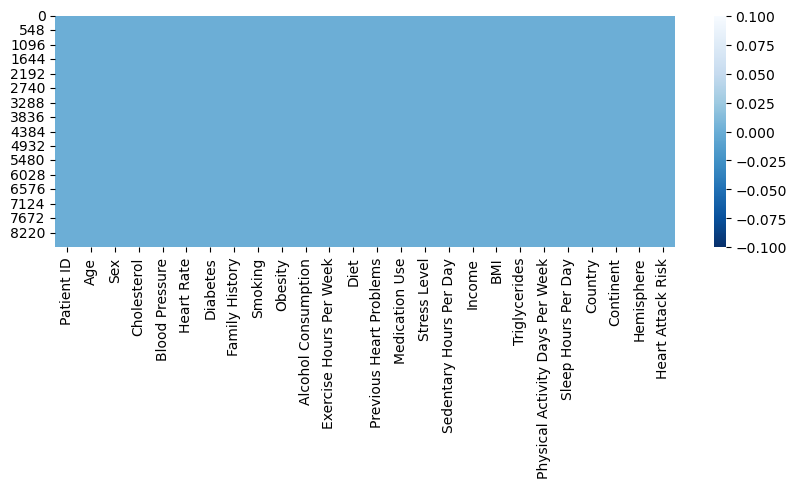

In [10]:
#visualise missing values
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

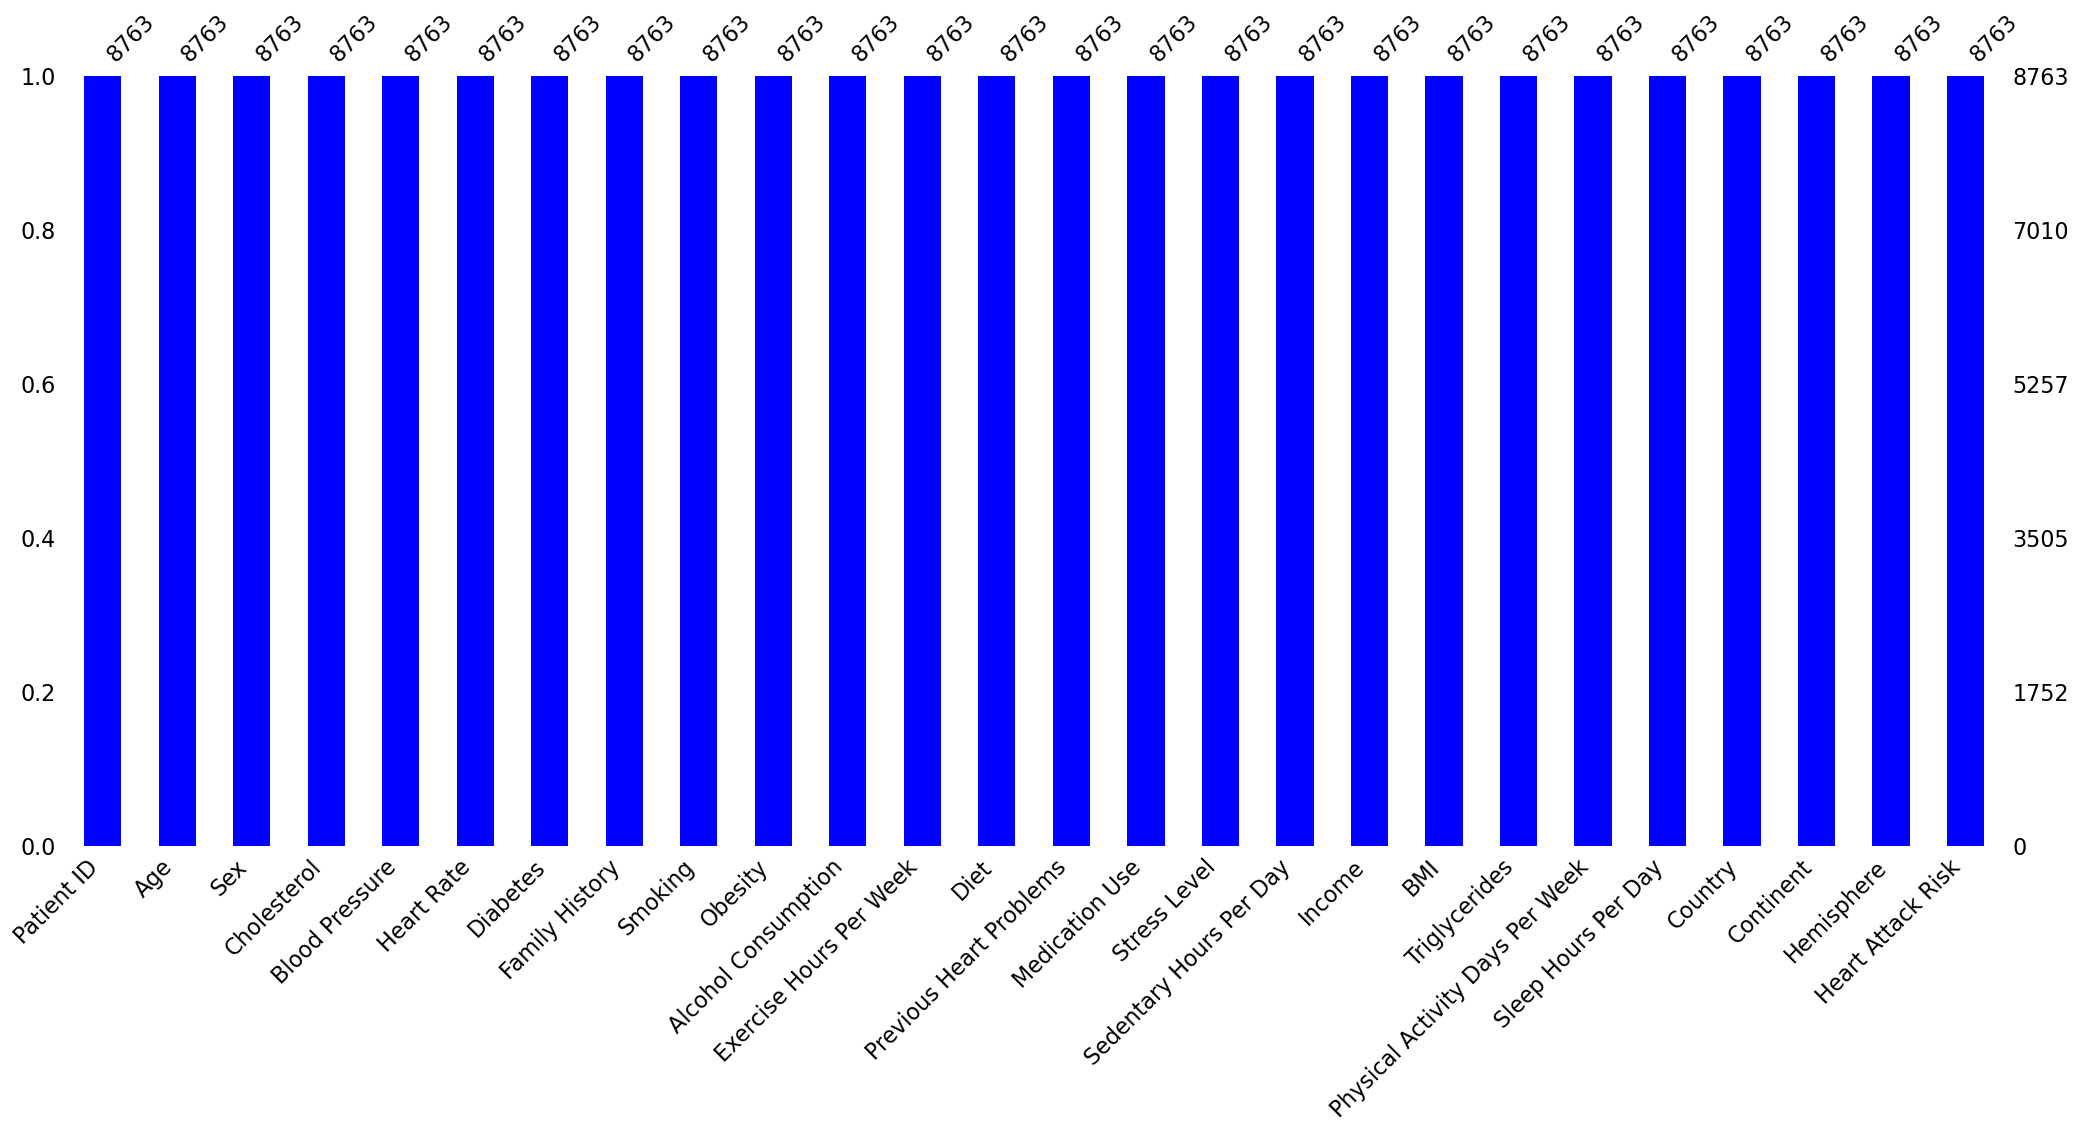

In [11]:
# visualise missing no
msno.bar(df,color="blue");

### Data Cleaning

##### Drop Irrelevant Columns

In [12]:
columns_to_drop = ['Hemisphere', 'Patient ID', 'Continent']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


In [13]:
# Splitting 'Blood Pressure' into systolic/diastolic for better classification
if "Blood Pressure" in df.columns:
    bp_split = df["Blood Pressure"].str.split("/", expand=True)
    df["Systolic_BP"] = pd.to_numeric(bp_split[0], errors="coerce")
    df["Diastolic_BP"] = pd.to_numeric(bp_split[1], errors="coerce")
    df.drop("Blood Pressure", axis=1, inplace=True)
 
#  Confirm final structure
print("Cleaning, rounding & normalization complete!")
print(f"Final shape: {df.shape}")
print("Data preview:")
print(df.head())

Cleaning, rounding & normalization complete!
Final shape: (8763, 24)
Data preview:
   Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    Male          208          72         0               0        1   
1   21    Male          389          98         1               1        1   
2   21  Female          324          72         1               0        0   
3   84    Male          383          73         1               1        1   
4   66    Male          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week       Diet  \
0        0                    0                 4.168189    Average   
1        1                    1                 1.813242  Unhealthy   
2        0                    0                 2.078353    Healthy   
3        0                    1                 9.828130    Average   
4        1                    0                 5.804299  Unhealthy   

   Previous Heart Pro

In [14]:
#Check for missing values after data splitting
missing_summary =df.isnull().sum()
total_missing = missing_summary.sum()
 
print("\nMissing values per column:")
print(missing_summary)
 
print("\nData types summary after cleaning:")
print(df.info())


Missing values per column:
Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Heart Attack Risk                  0
Systolic_BP                        0
Diastolic_BP                       0
dtype: int64

Data types summary after cleaning:
<class 'pandas.core.frame.DataFrame

#### Feature Engineering

In [15]:
# Feature Engineering
df["BMI_Stress"] = df["BMI"] * df["Stress Level"]
df["Activity_Ratio"] = df["Exercise Hours Per Week"] / (df["Sedentary Hours Per Day"] + 1)
df["BP_Product"] = df["Systolic_BP"] * df["Diastolic_BP"]
df["Sleep_Stress_Interaction"] = df["Sleep Hours Per Day"] * df["Stress Level"]
df["Substance_Use"] = df["Smoking"] * df["Alcohol Consumption"]

In [16]:
print("\nData types summary after feature engineering:")
print(df.info())


Data types summary after feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          87

In [17]:
df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Heart Attack Risk                     2
Systolic_BP                          91
Diastolic_BP                         51
BMI_Stress                         8763


#### Exploratory Analysis

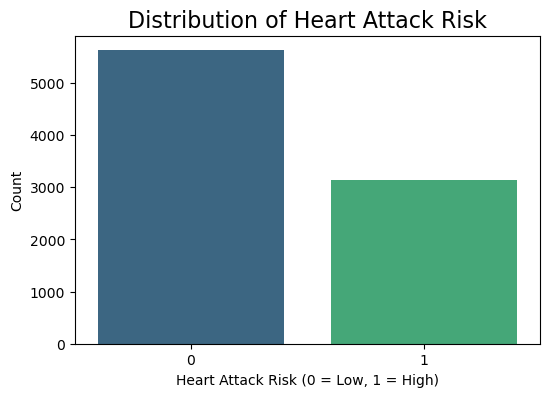

In [18]:
# ---  Distribution of Target Variable --
plt.figure(figsize=(6,4))
sns.countplot(x="Heart Attack Risk", hue="Heart Attack Risk",data=df, palette="viridis",
legend=False
)
plt.title("Distribution of Heart Attack Risk", fontsize = 16)
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

#### Univariate Analysis

#### Numerical Data

In [19]:
numerical_df =df.select_dtypes(exclude = "object")
numerical_df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0,158,88,281.261095,0.547365,13904,54,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0,165,93,27.194973,0.304059,15345,7,1
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0,174,99,253.589136,0.198630,17226,36,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0,163,100,328.182339,1.136334,16300,36,1
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0,91,88,130.854865,2.308037,8008,30,0


In [20]:
numerical_df.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP', 'BMI_Stress',
       'Activity_Ratio', 'BP_Product', 'Sleep_Stress_Interaction',
       'Substance_Use'],
      dtype='object')

In [21]:
numerical_cols = numerical_df.columns
numerical_cols

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP', 'BMI_Stress',
       'Activity_Ratio', 'BP_Product', 'Sleep_Stress_Interaction',
       'Substance_Use'],
      dtype='object')

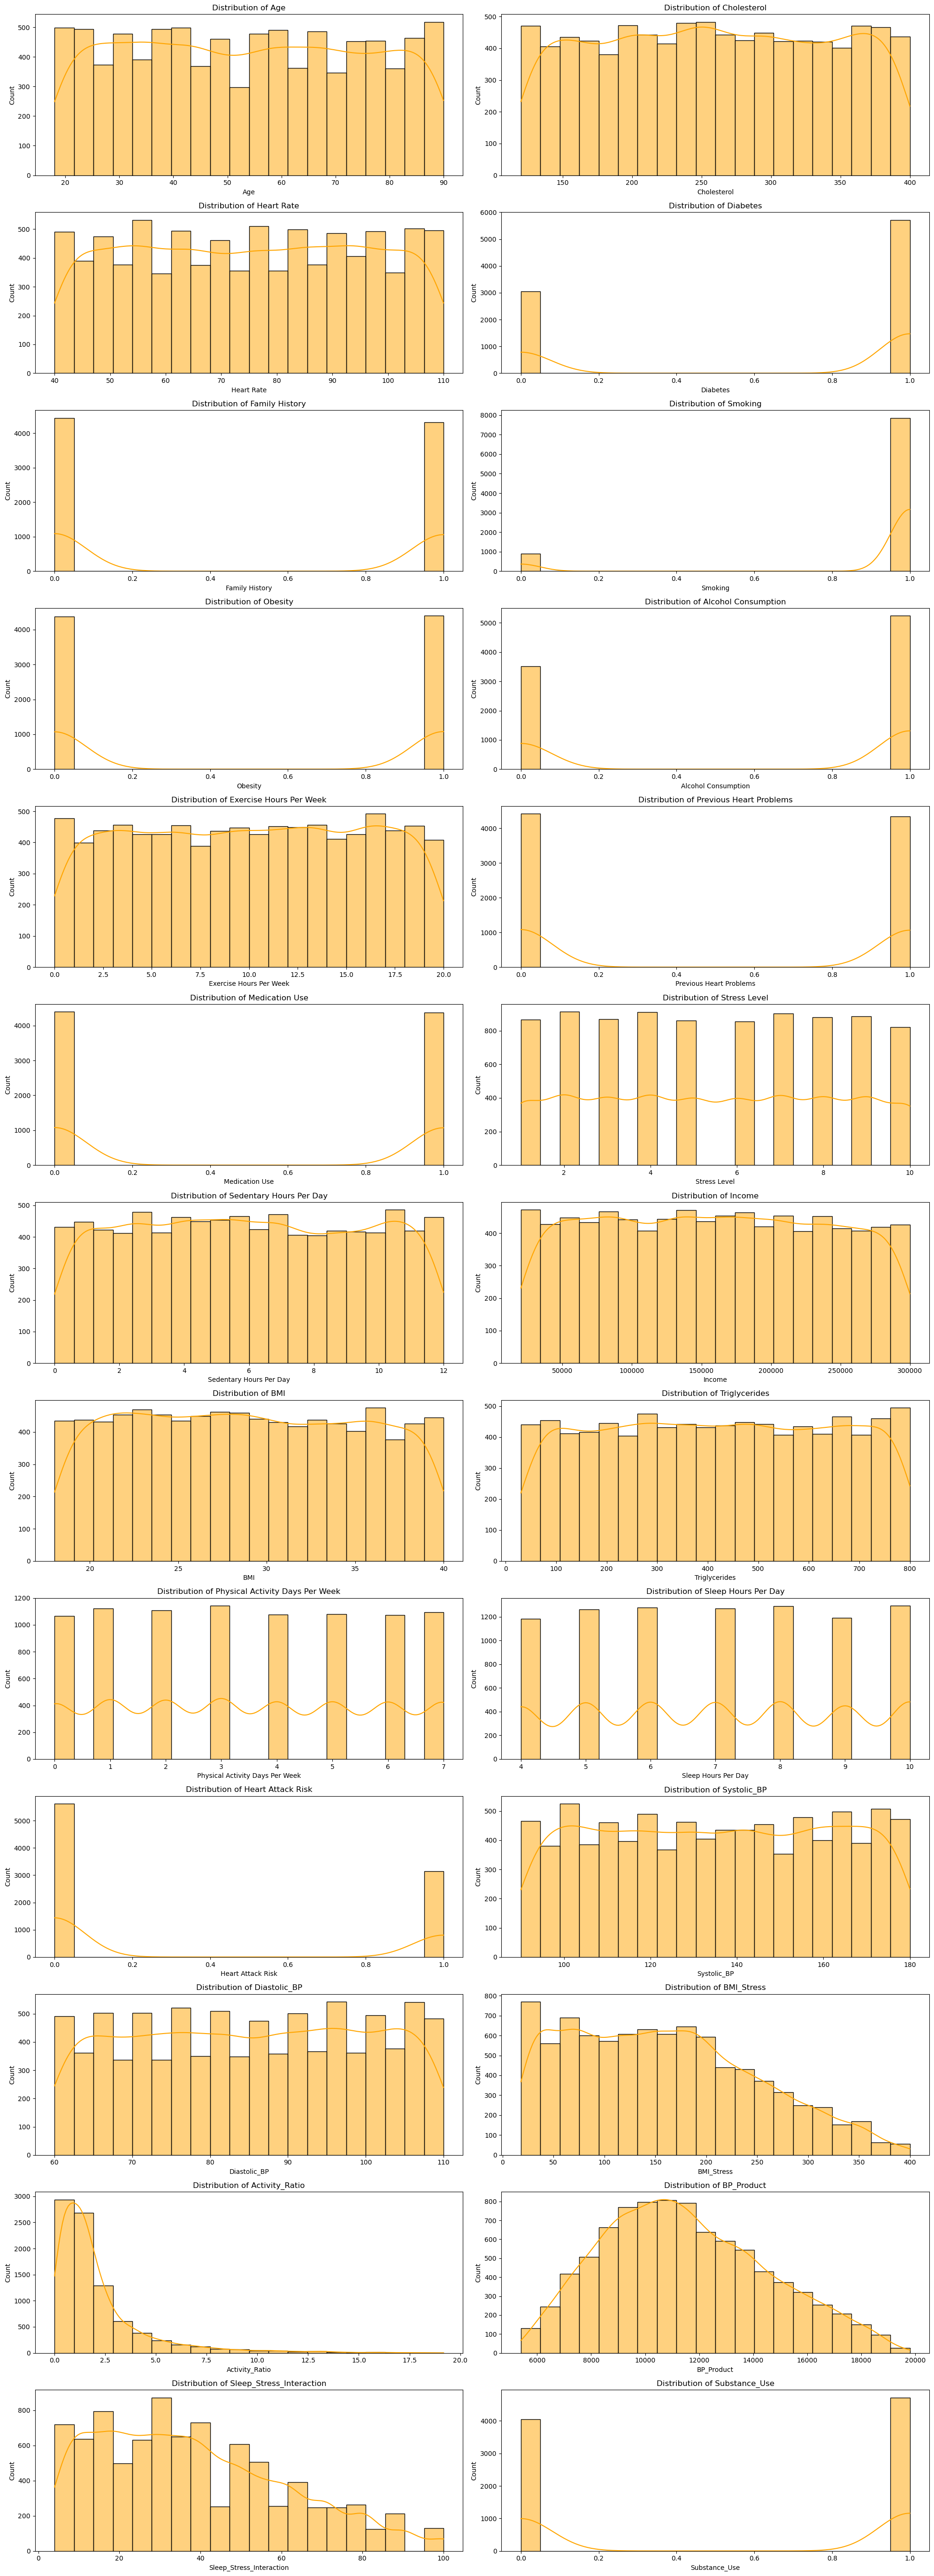

In [22]:
numerical_cols = numerical_df.columns

n_features = len(numerical_cols)
num_cols = 2
num_rows = (n_features +1)//num_cols

fig, axes = plt.subplots(ncols = num_cols, nrows = num_rows, figsize = (20,55))

position = axes.flatten()
for index, name_of_feature in enumerate (numerical_cols):
    sns.histplot(data=df[name_of_feature], bins=20, color="orange", kde=True, ax=position[index])
    position[index].set_title(f"Distribution of {name_of_feature}")
   
plt.tight_layout();

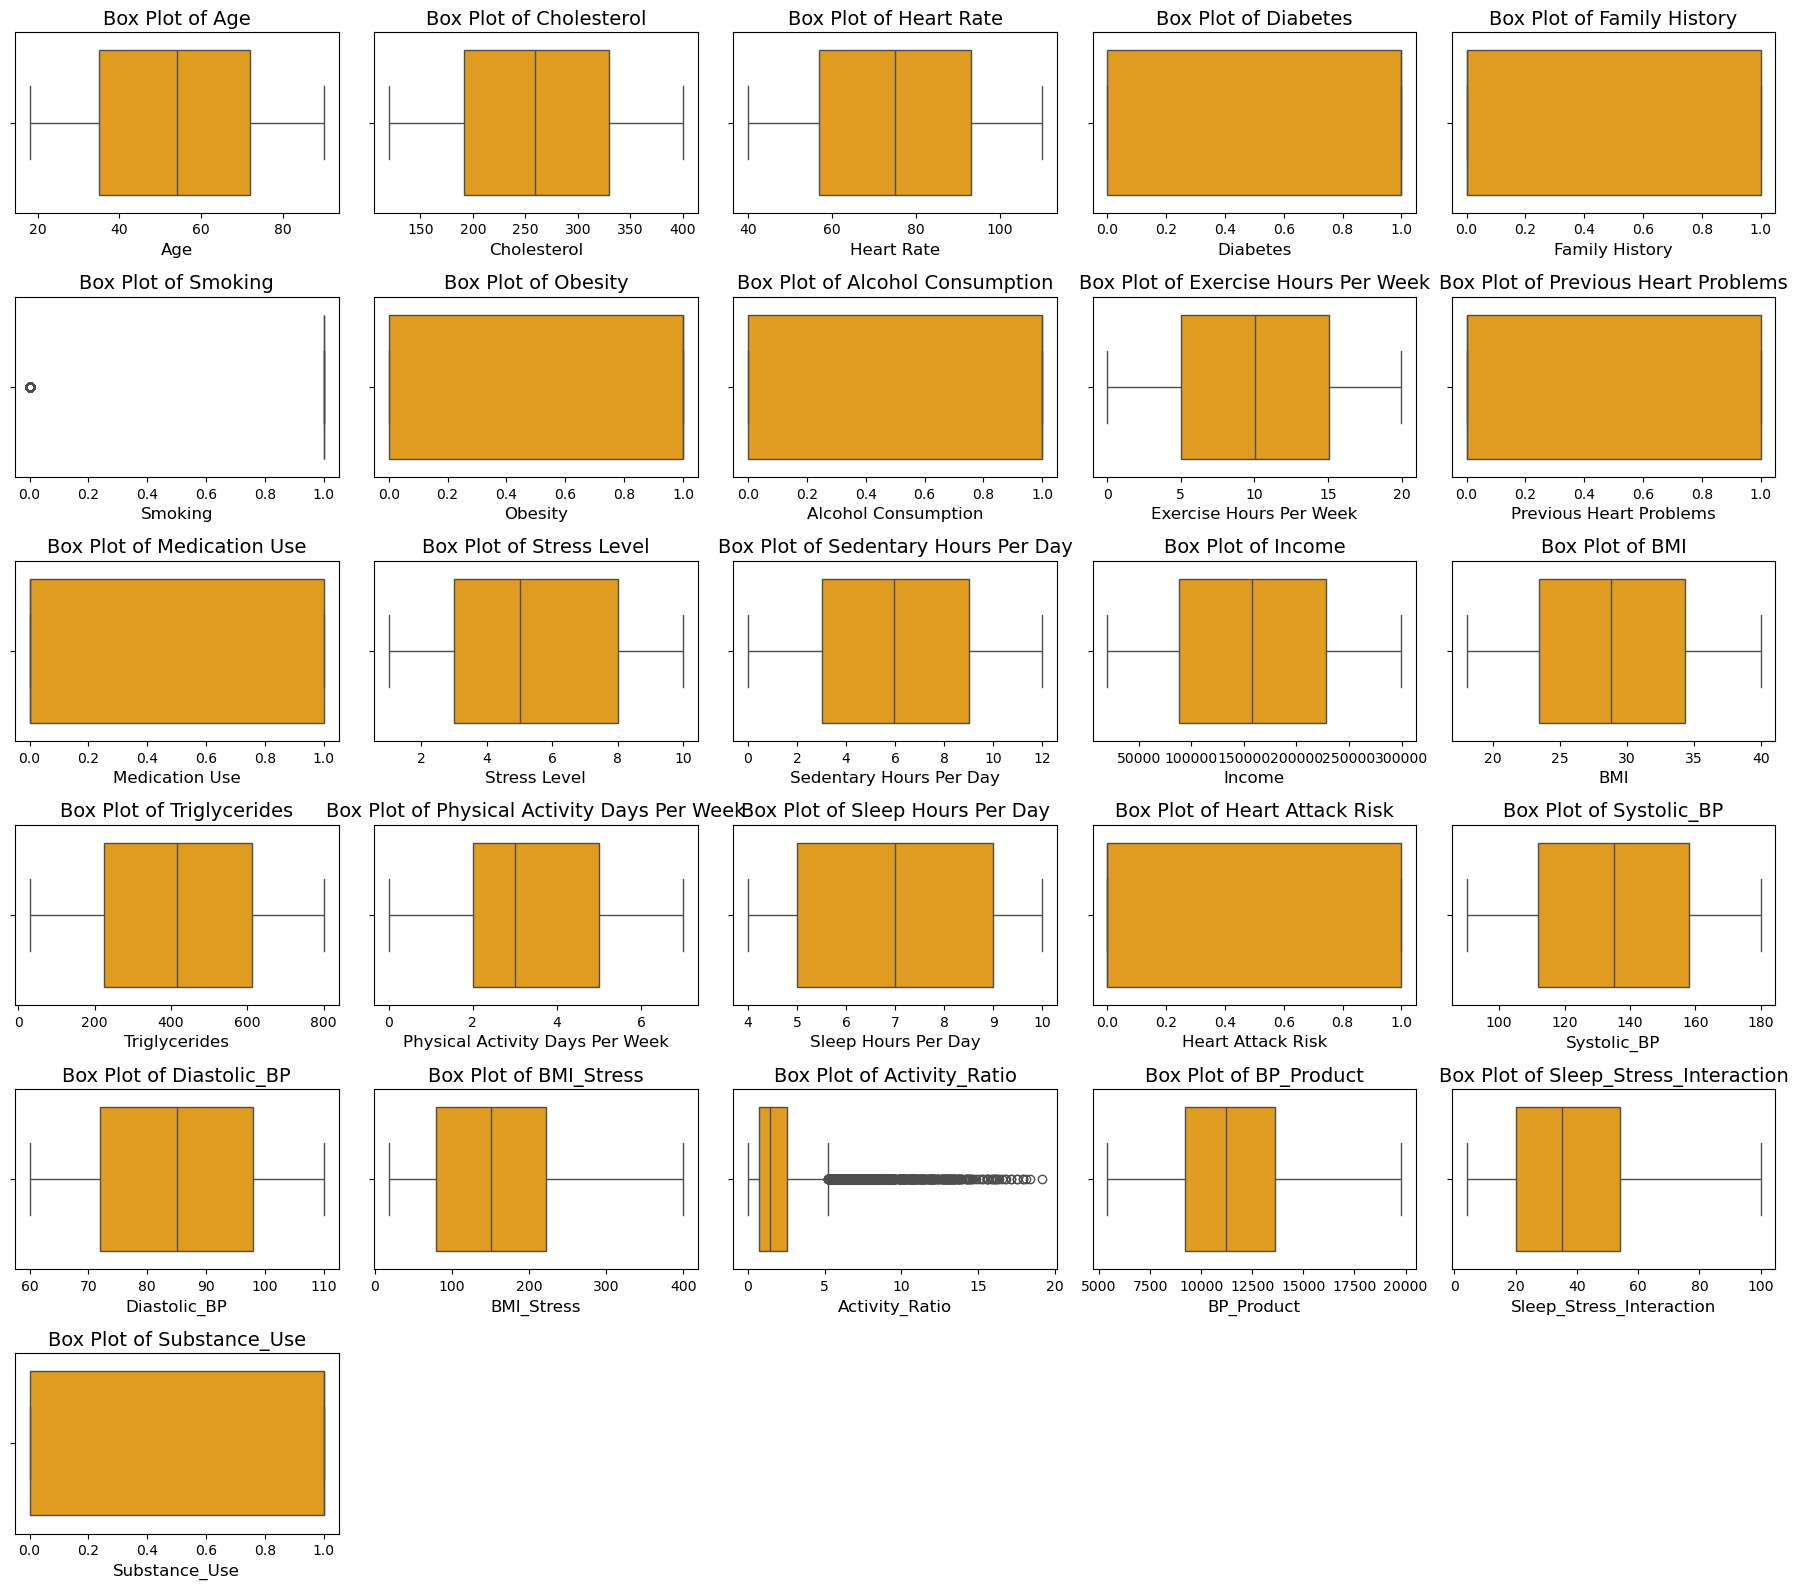

In [23]:
# List of numerical features for univariate analysis
numerical_features = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP', 'BMI_Stress',
       'Activity_Ratio', 'BP_Product', 'Sleep_Stress_Interaction',
       'Substance_Use']

# Set up the plot grid  
plt.figure(figsize=(18, 16))

# Create box plots for each numerical feature 
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(data=df, x=feature, color='orange')
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.grid(False)  # Remove gridlines
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
# Handling Outliers
numeric_columns = ['Activity_Ratio']
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Winsorization: Cap outliers instead of removing them
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        
        print(f"Outliers handled for '{col}' | Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    return df

df = handle_outliers(df, numeric_columns)

Outliers handled for 'Activity_Ratio' | Lower bound: -2.00, Upper bound: 5.23


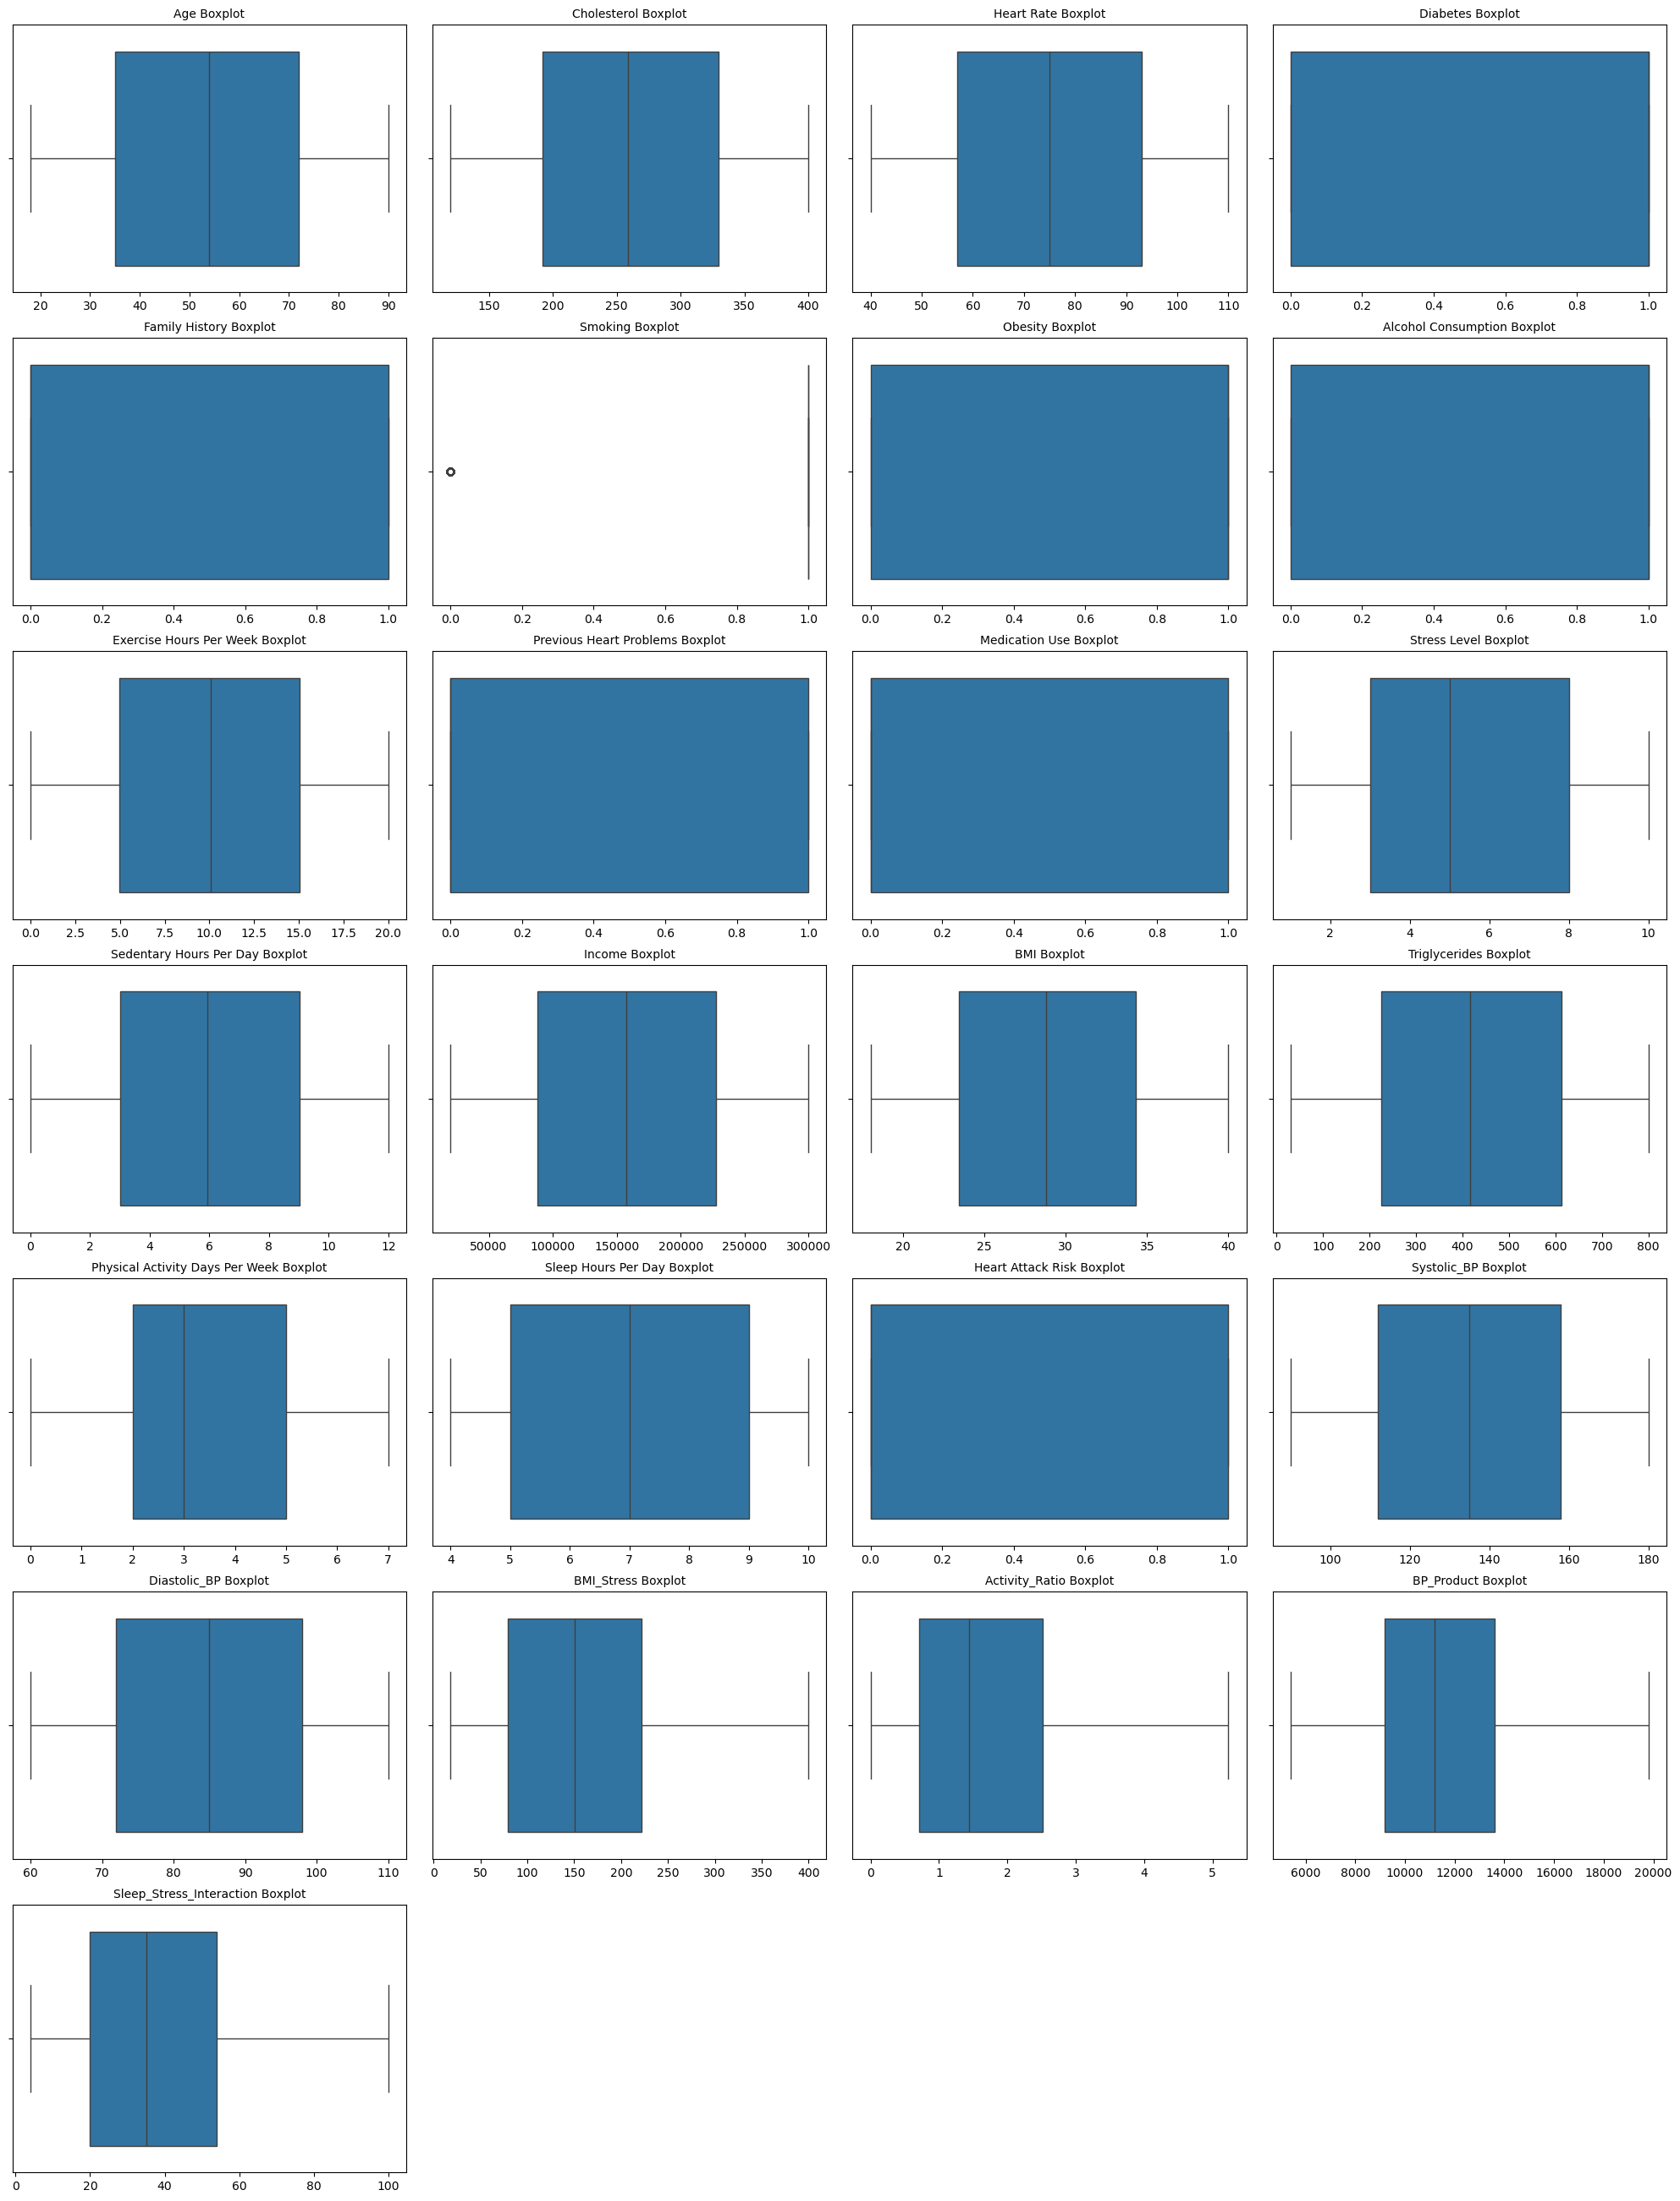

In [25]:
import math

def visualize_df(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns.pop() # remove active

    n_cols = 4
    n_rows = math.ceil(len(numeric_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"{col} Boxplot", fontsize=10)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("") 

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

visualize_df(df)

### Categorical Data

In [26]:
categorical_df = df.select_dtypes(include = "object")
categorical_df.head()

,Sex,Diet,Country
0,Male,Average,Argentina
1,Male,Unhealthy,Canada
2,Female,Healthy,France
3,Male,Average,Canada
4,Male,Unhealthy,Thailand


In [27]:
categorical_df.columns

Index(['Sex', 'Diet', 'Country'], dtype='object')

In [28]:
categorical_cols = categorical_df.columns
categorical_cols

Index(['Sex', 'Diet', 'Country'], dtype='object')

In [29]:
df['Sex'].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

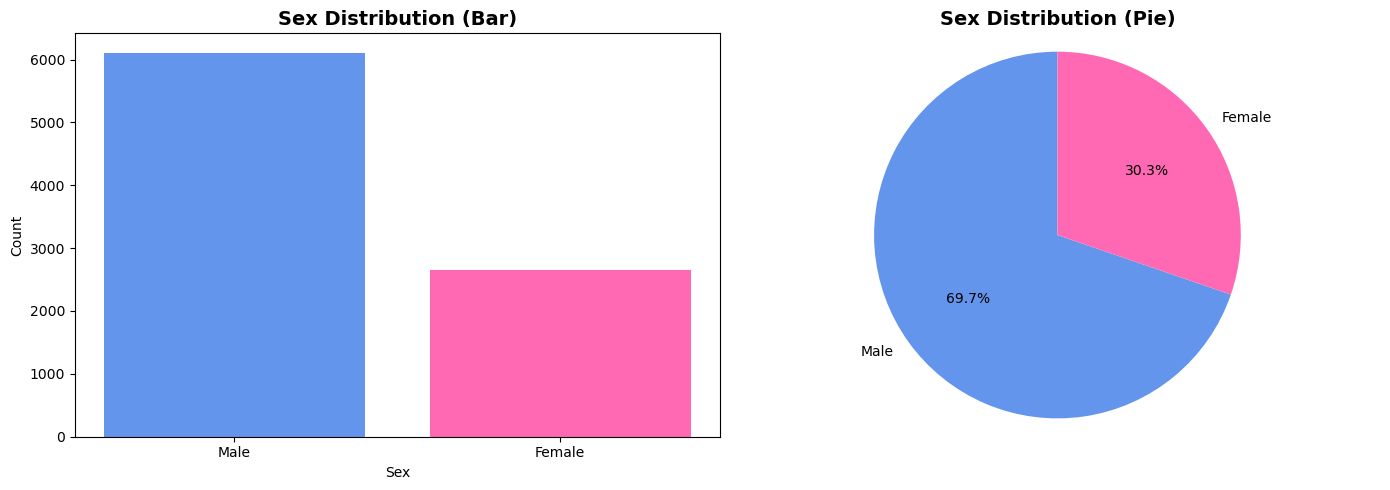

In [30]:
Sex_counts = df['Sex'].value_counts()

# Create 1 row × 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart 
axs[0].set_title('Sex Distribution (Bar)', fontsize=14, fontweight='bold')
axs[0].bar(Sex_counts.index, Sex_counts.values, color=['#6495ED', '#FF69B4'])
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

# Pie Chart 
axs[1].set_title('Sex Distribution (Pie)', fontsize=14, fontweight='bold')
axs[1].pie(Sex_counts.values,
           labels=Sex_counts.index,
           autopct='%1.1f%%',
           colors=['#6495ED', '#FF69B4'],
           startangle=90)
axs[1].axis('equal')

plt.tight_layout()
plt.show()

In [31]:
df['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

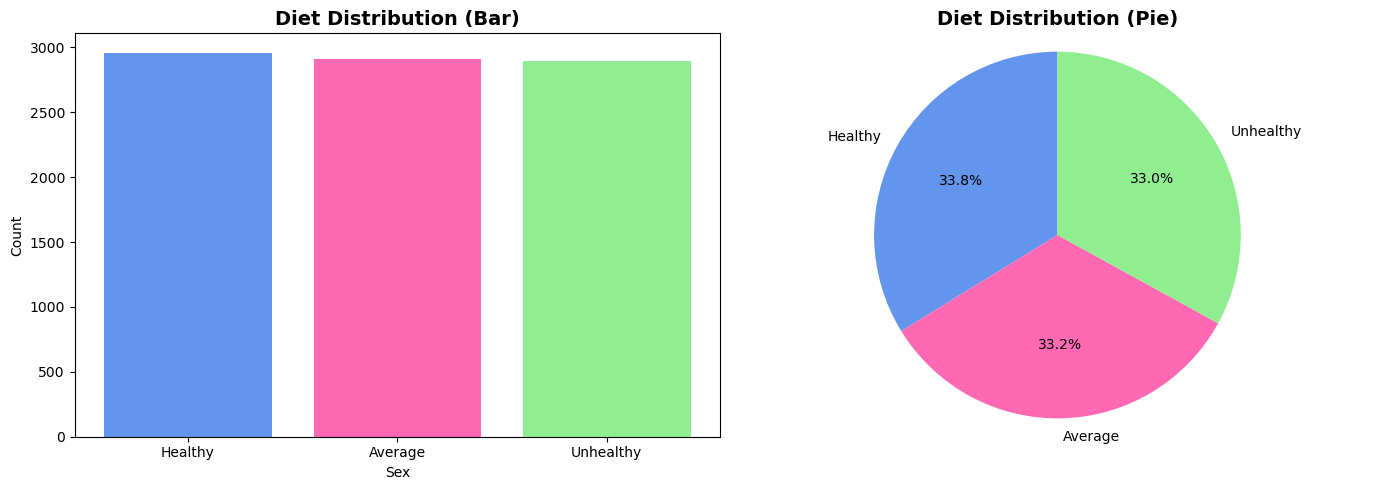

In [32]:
Diet_counts = df['Diet'].value_counts()

# Create 1 row × 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart 
axs[0].set_title('Diet Distribution (Bar)', fontsize=14, fontweight='bold')
axs[0].bar(Diet_counts.index, Diet_counts.values, color=['#6495ED', '#FF69B4', '#90EE90'])
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

# Pie Chart 
axs[1].set_title('Diet Distribution (Pie)', fontsize=14, fontweight='bold')
axs[1].pie(Diet_counts.values,
           labels=Diet_counts.index,
           autopct='%1.1f%%',
           colors=['#6495ED', '#FF69B4', '#90EE90'],
           startangle=90)
axs[1].axis('equal')

plt.tight_layout()
plt.show()

In [33]:
df['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

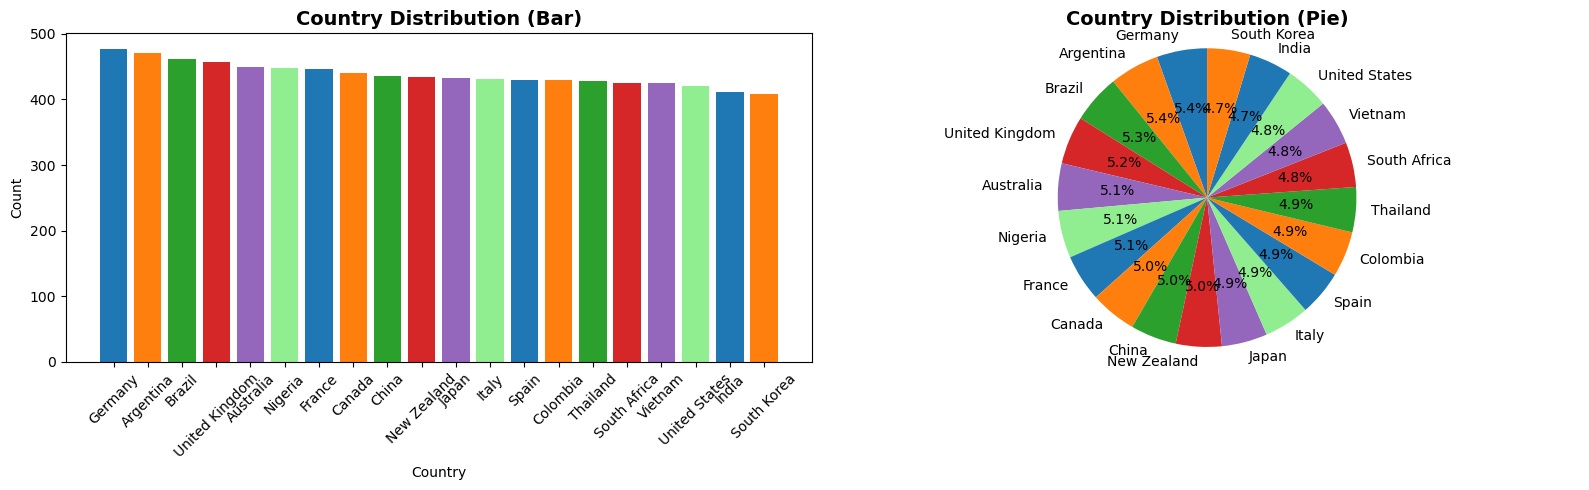

In [34]:
Country_counts = df['Country'].value_counts()

# Create 1 row × 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

#  Bar Chart 
axs[0].set_title('Country Distribution (Bar)', fontsize=14, fontweight='bold')
axs[0].bar(Country_counts.index, Country_counts.values,
           color=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#90EE90'])
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Pie Chart 
axs[1].set_title('Country Distribution (Pie)', fontsize=14, fontweight='bold')
axs[1].pie(Country_counts.values,
           labels=Country_counts.index,
           autopct='%1.1f%%',
           colors=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#90EE90'],
           startangle=90)
axs[1].axis('equal')  

plt.tight_layout()
plt.show()

### Bivariate Analysis

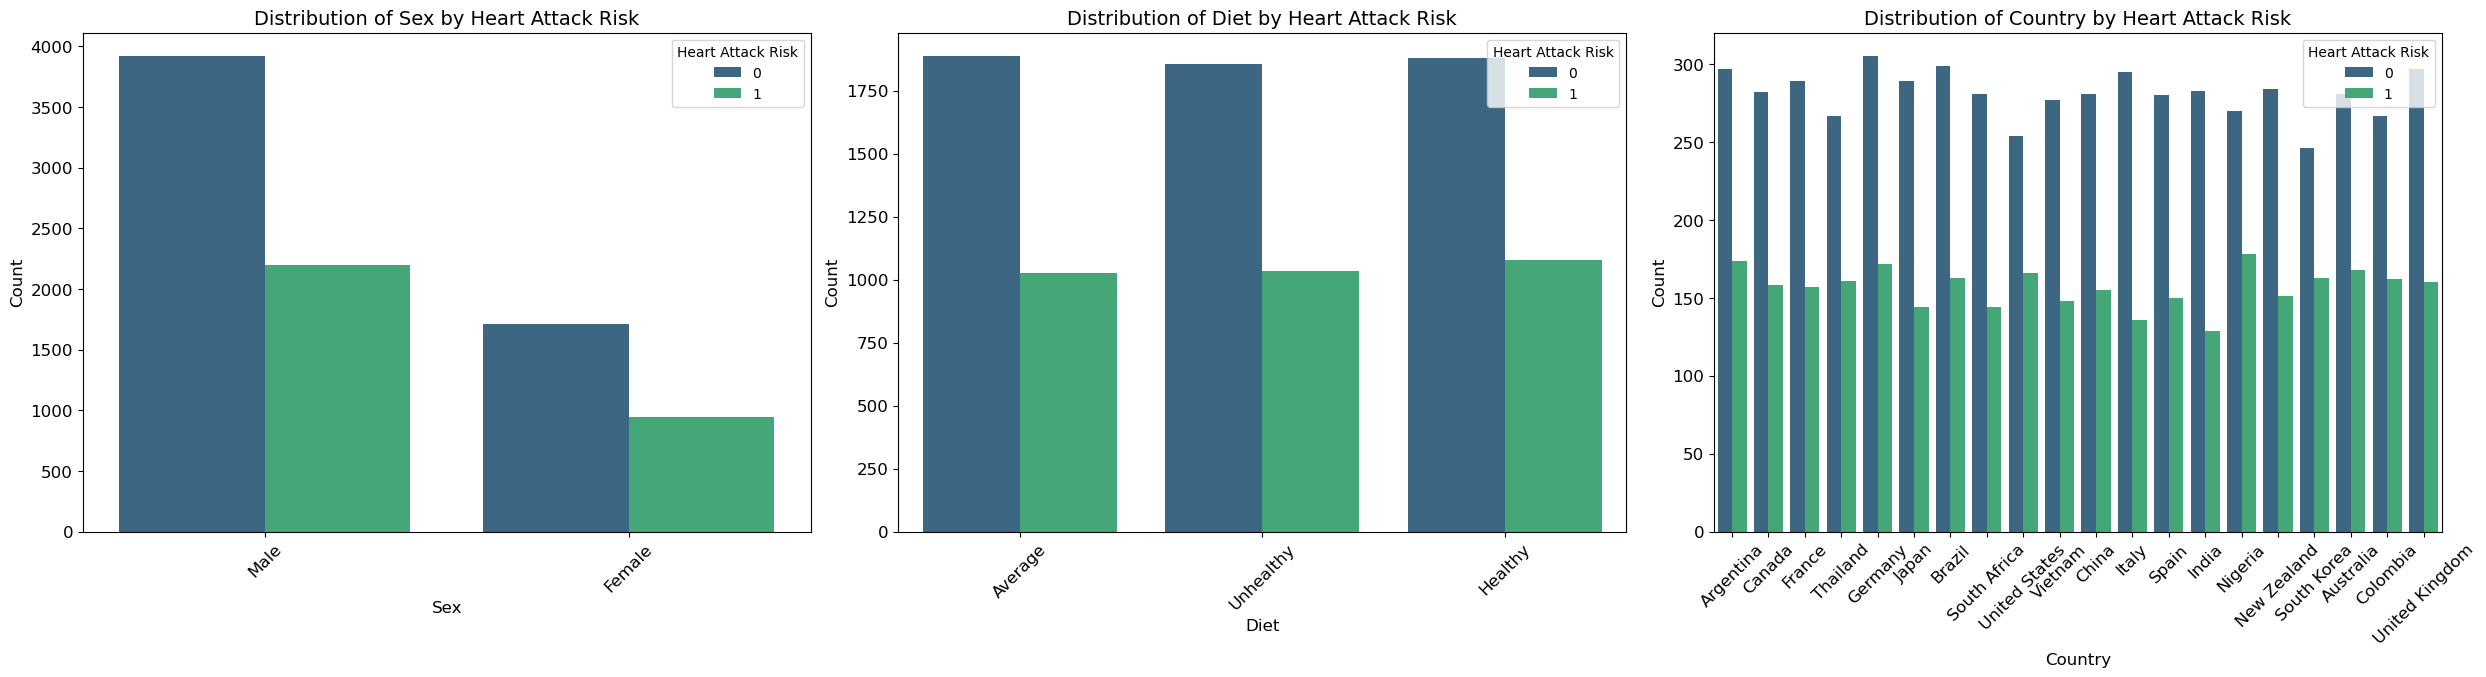

In [35]:
#set up the plot grid
plt.figure(figsize=(25,25))

# Create bar plots for each categorical feature with default as hue
for index, feature in enumerate (categorical_cols, 1):
    plt.subplot(4,3,index)
    sns.countplot (data=df, x=feature, hue='Heart Attack Risk', palette='viridis')
    plt.title(f'Distribution of {feature} by Heart Attack Risk', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
plt.tight_layout()
plt.show()

##### Correlation Matrix

In [36]:
### Correlation

df.corr(numeric_only = True)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403,0.003070,-0.009826,0.011613,-0.019678,-0.000859,0.015822,0.133071
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340,0.000133,0.002083,-0.014357,0.004821,0.000783,-0.020141,0.003197
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251,0.008482,-0.018113,0.001493,0.013554,-0.005400,0.002136,-0.007566
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225,-0.005306,-0.000512,0.003407,-0.002441,-0.006335,0.000796,0.004401
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652,-0.009762,0.017818,0.006456,-0.006127,0.005881,0.007301,0.019965
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051,-0.009534,-0.012293,-0.001363,-0.013864,-0.015943,0.000152,0.366202
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318,-0.001918,-0.020574,0.005869,0.005766,-0.019034,0.014422,-0.016586
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778,0.010764,-0.007282,0.002890,0.002831,0.003444,-0.001622,0.885131
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133,-0.009506,-0.003469,-0.006830,0.619917,-0.009764,-0.011389,-0.004167
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,0.000274,-0.011926,0.008813,-0.012206,0.006966,-0.004191,-0.014461,0.005561


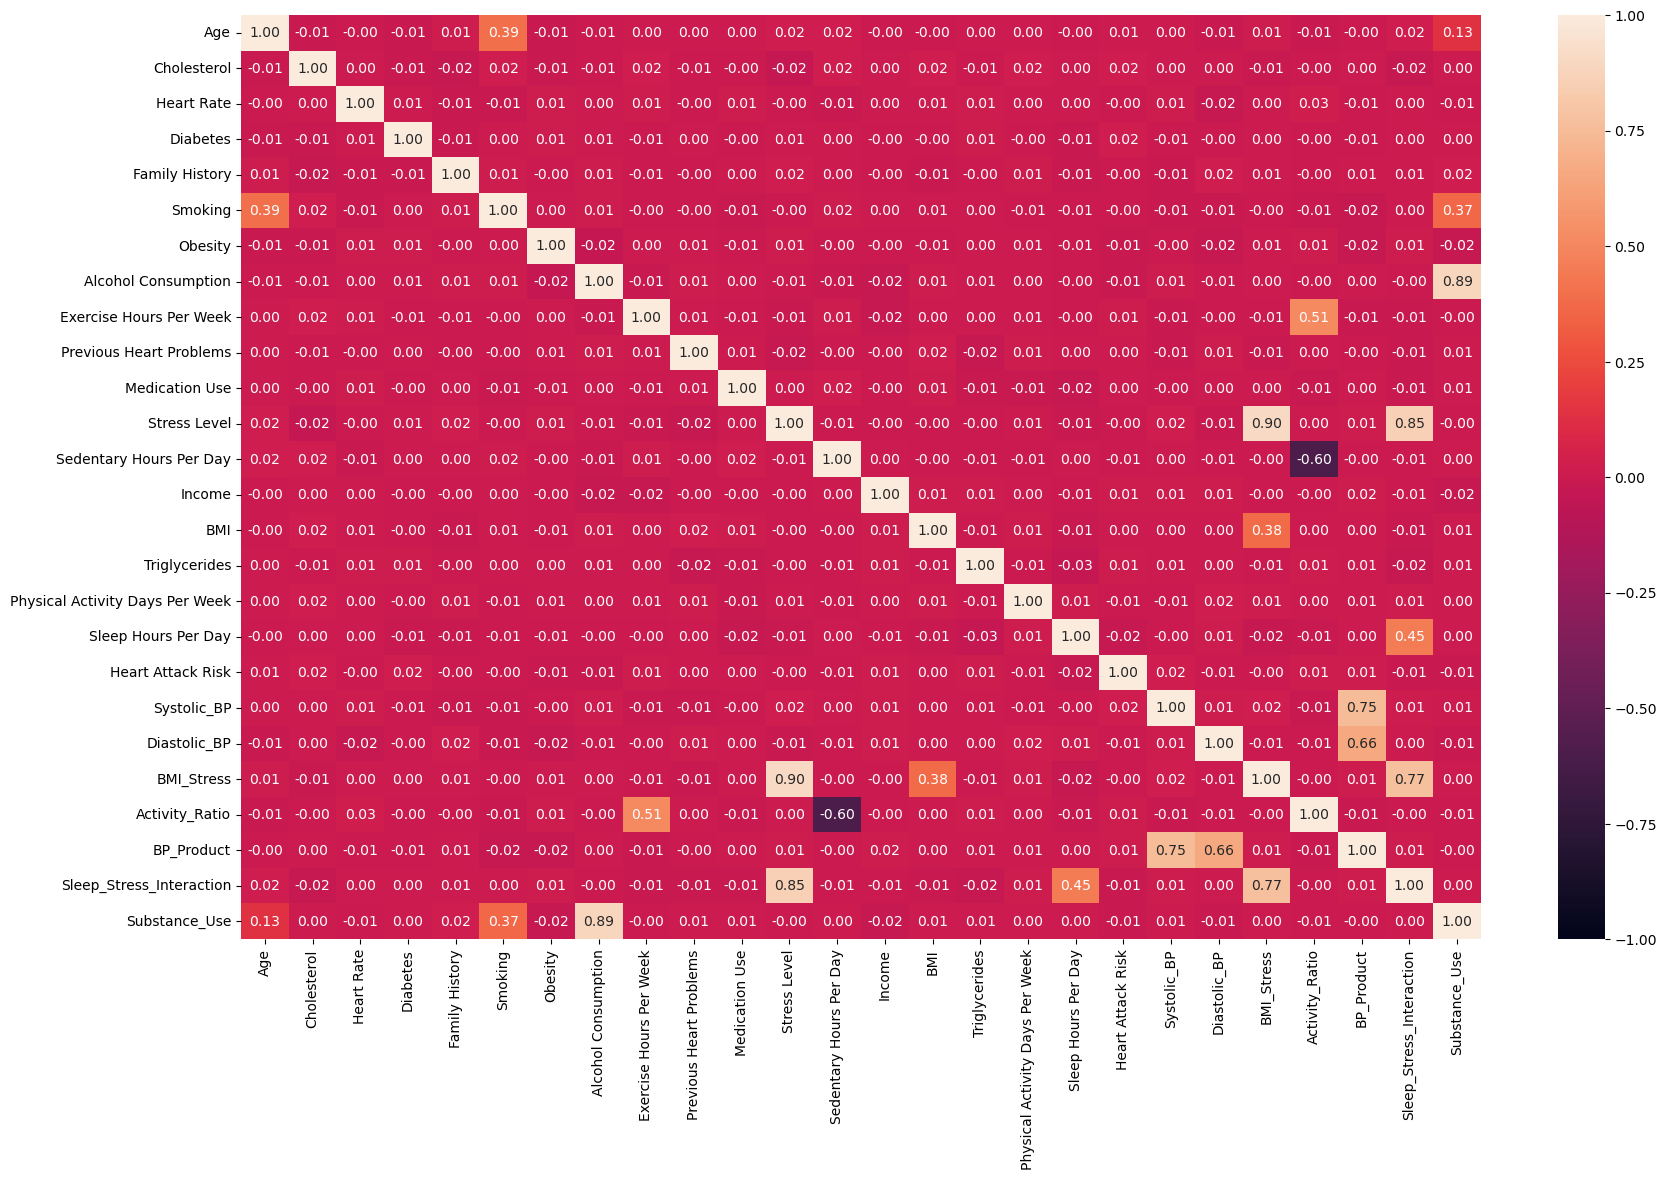

In [37]:
plt.figure(figsize = (20,12))
sns.heatmap(data = numerical_df.corr(), cbar=True, vmin= -1 , vmax= 1, fmt= ".2f", annot=True) 
plt.show();

In [38]:
columns_to_drop = ['Country']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,0,158,88,281.261095,0.547365,13904,54,0
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,0,165,93,27.194973,0.304059,15345,7,1
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,0,174,99,253.589136,0.198630,17226,36,0
3,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,0,163,100,328.182339,1.136334,16300,36,1
4,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,0,91,88,130.854865,2.308037,8008,30,0


In [39]:
categorical_df = df.select_dtypes(include = "object")
categorical_df.head()

,Sex,Diet
0,Male,Average
1,Male,Unhealthy
2,Female,Healthy
3,Male,Average
4,Male,Unhealthy


In [40]:
categorical_cols1 = categorical_df.columns
categorical_cols1

Index(['Sex', 'Diet'], dtype='object')

### Heart Attack Risk Prediction

#### Data Preprocessing 

In [41]:
df.head(3)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,0,158,88,281.261095,0.547365,13904,54,0
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,0,165,93,27.194973,0.304059,15345,7,1
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,0,174,99,253.589136,0.198630,17226,36,0


In [42]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk', 'Systolic_BP', 'Diastolic_BP', 'BMI_Stress',
       'Activity_Ratio', 'BP_Product', 'Sleep_Stress_Interaction',
       'Substance_Use'],
      dtype='object')

In [43]:
### Features and Label

# x = Features
# y = Label

In [44]:
x = df.drop(['Heart Attack Risk'], axis=1)
y = df['Heart Attack Risk']

In [45]:
x.head(3)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,158,88,281.261095,0.547365,13904,54,0
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,165,93,27.194973,0.304059,15345,7,1
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,174,99,253.589136,0.198630,17226,36,0


In [46]:
y.head(3)

0    0
1    0
2    0
Name: Heart Attack Risk, dtype: int64

#### Encoding Categorical Features

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
for column_name in categorical_cols1:
    x[column_name]=encoder.fit_transform(df[column_name])
x.head(3)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,0,9,6.615001,261404,31.251233,286,0,6,158,88,281.261095,0.547365,13904,54,0
1,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,285768,27.194973,235,1,7,165,93,27.194973,0.304059,15345,7,1
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,1,9,9.463426,235282,28.176571,587,4,4,174,99,253.589136,0.198630,17226,36,0


In [49]:
print(f"Data contained {len(x)} records before splitting")

Data contained 8763 records before splitting


In [50]:
# Splitting Data into Training and Test sets 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
xtrain.head(3)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
1034,21,1,250,78,1,0,1,0,1,2.392506,1,1,1,4,11.451720,273208,23.575795,176,2,5,109,76,94.303181,0.192143,8284,20,1
5408,41,1,172,83,1,1,1,1,0,9.494553,0,1,0,3,9.373237,103732,25.773309,251,2,8,134,106,77.319926,0.915293,14204,24,0
7150,45,1,158,84,1,1,1,0,1,6.292732,2,1,0,2,0.025076,268700,35.708303,669,0,10,116,75,71.416605,5.232644,8700,20,1


In [52]:
xtest.head(3)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
5321,33,1,268,90,0,0,1,1,1,11.617532,2,0,1,1,1.792088,70688,38.326296,501,2,6,112,95,38.326296,4.160876,10640,6,1
6332,24,1,356,90,1,0,1,0,0,2.138641,2,1,0,6,4.496397,236798,23.581421,282,0,5,145,98,141.488525,0.389099,14210,30,0
6462,29,1,308,107,1,1,1,0,1,4.592738,2,1,0,1,1.059783,273969,27.385601,753,6,9,120,86,27.385601,2.229720,10320,9,1


In [53]:
len(xtest) == len(ytest)

True

In [54]:
len(xtrain) == len(ytrain)

True

#### Model Training 

In [55]:
# Initialize and train classification models

Classification_Models = [
    (SGDClassifier(loss="log_loss", random_state=42, max_iter=2000, tol=1e-3),'sgd_model'),
    (DecisionTreeClassifier(random_state=42),'dt_model'),
    (LogisticRegression(random_state=42, max_iter=2000, solver="lbfgs"),'lr_model'),
    (RandomForestClassifier(random_state=42, n_jobs=-1), 'rf_model'),
    (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),'xgb_model'),
    (KNeighborsClassifier(),'knn_model')
]

In [56]:
# Initialize and train regression models

Regression_Models = [
    (LinearRegression(), 'linear_reg'),
    (Ridge(), 'ridge_reg'),
    (Lasso(), 'lasso_reg'),
    (ElasticNet(), 'elasticnet_reg'),
    (DecisionTreeRegressor(random_state=42), 'dt_reg'),
    (RandomForestRegressor(random_state=42), 'rf_reg')
]

In [57]:
Classification_Models

[(SGDClassifier(loss='log_loss', max_iter=2000, random_state=42), 'sgd_model'),
 (DecisionTreeClassifier(random_state=42), 'dt_model'),
 (LogisticRegression(max_iter=2000, random_state=42), 'lr_model'),
 (RandomForestClassifier(n_jobs=-1, random_state=42), 'rf_model'),
 (XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=-1,
                num_parallel_tree

In [58]:
Regression_Models

[(LinearRegression(), 'linear_reg'),
 (Ridge(), 'ridge_reg'),
 (Lasso(), 'lasso_reg'),
 (ElasticNet(), 'elasticnet_reg'),
 (DecisionTreeRegressor(random_state=42), 'dt_reg'),
 (RandomForestRegressor(random_state=42), 'rf_reg')]

#### Evaluating Classification Models

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report, precision_recall_curve)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score

In [61]:
# Hyper parameter tuning of classifiction models

param_grids = {

    "lr_model": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"]
    },

    "dt_model": {
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 5, 10]
    },

    "rf_model": {
        "model__n_estimators": [100, 300],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_leaf": [1, 5],
        "model__max_features": ["sqrt", "log2"]
    },

    "xgb_model": {
        "model__n_estimators": [100, 300],
        "model__max_depth": [3, 6],
        "model__learning_rate": [0.05, 0.1],
        "model__subsample": [0.8, 1.0],
        "model__colsample_bytree": [0.8, 1.0]
    },

    "sgd_model": {
        "model__alpha": [1e-4, 1e-3, 1e-2],
        "model__penalty": ["l2", "l1"]
    },

    "knn_model": {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"],
        "model__p": [1, 2]   
    } 
}


<--- sgd_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.64176   1.00000   0.78179      1125
           1    0.00000   0.00000   0.00000       628

    accuracy                        0.64176      1753
   macro avg    0.32088   0.50000   0.39090      1753
weighted avg    0.41185   0.64176   0.50172      1753

Confusion Matrix:
 [[1125    0]
 [ 628    0]]


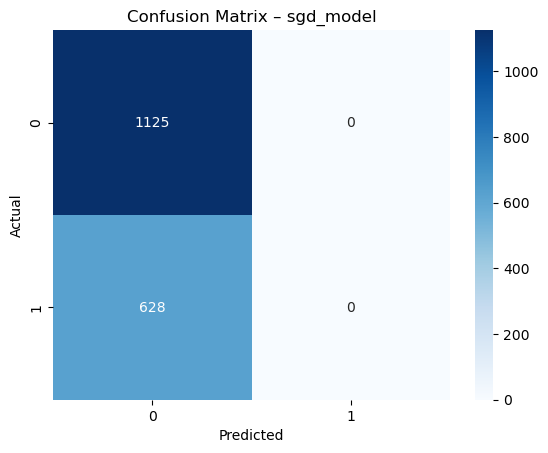

------------------------------------------------------------
<--- dt_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.63676   0.64978   0.64320      1125
           1    0.34876   0.33599   0.34225       628

    accuracy                        0.53736      1753
   macro avg    0.49276   0.49288   0.49273      1753
weighted avg    0.53359   0.53736   0.53539      1753

Confusion Matrix:
 [[731 394]
 [417 211]]


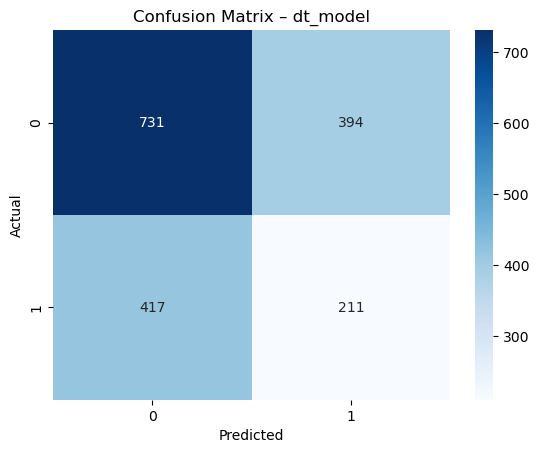

------------------------------------------------------------
<--- lr_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.64176   1.00000   0.78179      1125
           1    0.00000   0.00000   0.00000       628

    accuracy                        0.64176      1753
   macro avg    0.32088   0.50000   0.39090      1753
weighted avg    0.41185   0.64176   0.50172      1753

Confusion Matrix:
 [[1125    0]
 [ 628    0]]


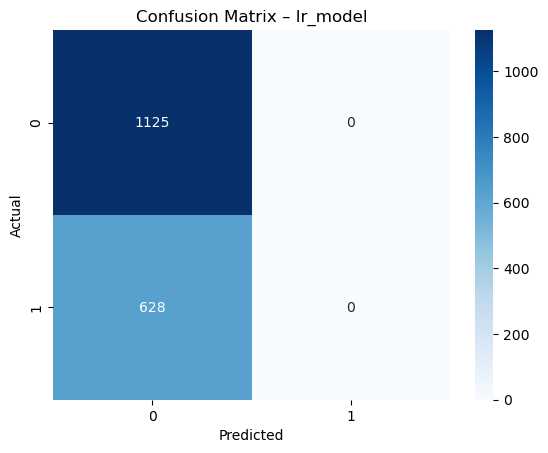

------------------------------------------------------------
<--- rf_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.64507   0.98222   0.77872      1125
           1    0.50000   0.03185   0.05988       628

    accuracy                        0.64176      1753
   macro avg    0.57253   0.50703   0.41930      1753
weighted avg    0.59310   0.64176   0.52120      1753

Confusion Matrix:
 [[1105   20]
 [ 608   20]]


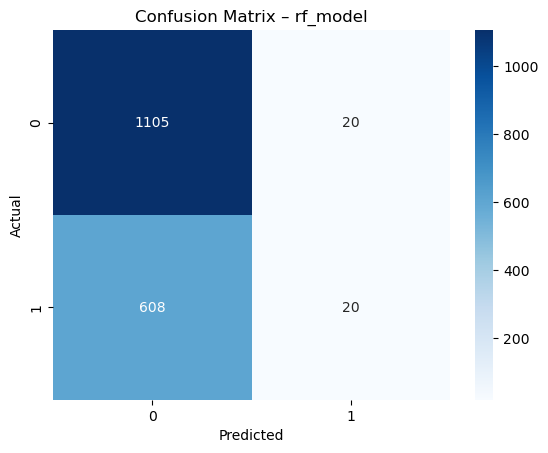

------------------------------------------------------------
<--- xgb_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.64251   0.81156   0.71720      1125
           1    0.36145   0.19108   0.25000       628

    accuracy                        0.58928      1753
   macro avg    0.50198   0.50132   0.48360      1753
weighted avg    0.54182   0.58928   0.54983      1753

Confusion Matrix:
 [[913 212]
 [508 120]]


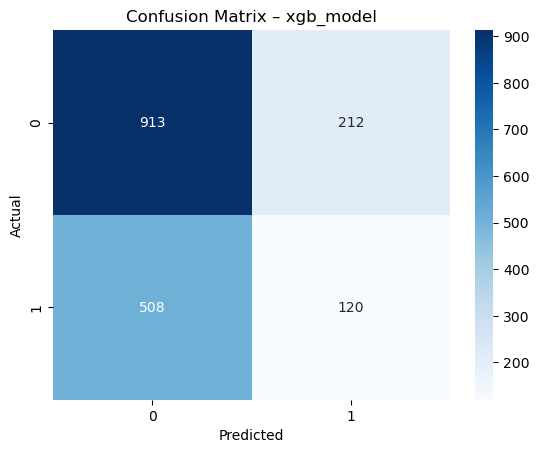

------------------------------------------------------------
<--- knn_model --->
Classification Report:
               precision    recall  f1-score   support

           0    0.63354   0.72533   0.67634      1125
           1    0.33548   0.24841   0.28545       628

    accuracy                        0.55448      1753
   macro avg    0.48451   0.48687   0.48089      1753
weighted avg    0.52676   0.55448   0.53631      1753

Confusion Matrix:
 [[816 309]
 [472 156]]


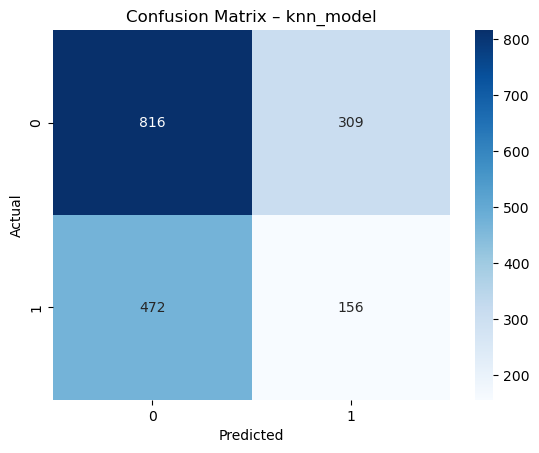

------------------------------------------------------------


In [62]:
c_results = []

for model, model_name in Classification_Models:
    print(f"<--- {model_name} --->")

    # Train model
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    # ROC-AUC handling
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(xtest)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(xtest)
    else:
        y_proba = None

    roc_auc = roc_auc_score(ytest, y_proba) if y_proba is not None else np.nan

    # Classification report
    print("Classification Report:\n",
          classification_report(ytest, y_pred, digits=5))

    matrix = confusion_matrix(ytest, y_pred)
    print("Confusion Matrix:\n", matrix)

    # Cross-validation metrics
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    }

    cv_results = cross_validate(model, xtrain, ytrain, cv=5, scoring=scoring, n_jobs=-1)

    # Save results
    c_results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(ytest, y_pred),
        'Precision': precision_score(ytest, y_pred),
        'Recall': recall_score(ytest, y_pred),
        'F1': f1_score(ytest, y_pred),
        'ROC-AUC': roc_auc,
        'CV Recall': cv_results['test_recall'].mean()
    })

    # Confusion matrix heatmap
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix – {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("-" * 60)

In [63]:
# Results DataFrame
print("\n================ CLASSIFICATION MODELS WITHOUT CLASS WEIGHTS, SCALING, HYPERPARAMETER TUNING AND OPTIMIZATION =================\n")

c_results_df = pd.DataFrame(c_results)
c_results_df = c_results_df.sort_values(by='Recall', ascending=False)
c_results_df


================ CLASSIFICATION MODELS WITHOUT CLASS WEIGHTS, SCALING, HYPERPARAMETER TUNING AND OPTIMIZATION =================



,Model,Accuracy,Precision,Recall,F1,ROC-AUC,CV Recall
1,dt_model,0.537365,0.348760,0.335987,0.342255,0.492883,0.381533
5,knn_model,0.554478,0.335484,0.248408,0.285453,0.478694,0.253682
4,xgb_model,0.589276,0.361446,0.191083,0.250000,0.498480,0.200164
3,rf_model,0.641757,0.500000,0.031847,0.059880,0.511321,0.033051
0,sgd_model,0.641757,0.000000,0.000000,0.000000,0.500000,0.998406
2,lr_model,0.641757,0.000000,0.000000,0.000000,0.485536,0.000000


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [65]:
print("\n================ CLASS-WEIGHTED MODELS + SCALED + HYPERPARAMETER TUNING =================\n")

csh_results = []

for model_instance, model_name in Classification_Models:
    print(f"\n================ {model_name.upper()} =================")

    # Clone model safely
    model = model_instance.__class__(**model_instance.get_params())

    # Apply class weights if supported
    if hasattr(model, "class_weight"):
        model.set_params(class_weight="balanced")

    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Hyperparameter Grid
    param_grid = param_grids.get(model_name, {})

    if not param_grid:
        print(f" No hyperparameters to tune for {model_name}")

    # GridSearchCV
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(xtrain, ytrain)
    best_model = grid.best_estimator_

    # Predictions (default decision rule)
    y_pred = best_model.predict(xtest)

    # ROC-AUC (if supported)
    model_step = best_model.named_steps['model']

    if hasattr(model_step, "predict_proba"):
        y_scores = best_model.predict_proba(xtest)[:, 1]
        roc_auc = roc_auc_score(ytest, y_scores)
    elif hasattr(model_step, "decision_function"):
        y_scores = best_model.decision_function(xtest)
        roc_auc = roc_auc_score(ytest, y_scores)
    else:
        roc_auc = np.nan
        print(" ROC-AUC not available for this model")

    # Metrics
    acc = accuracy_score(ytest, y_pred)
    prec = precision_score(ytest, y_pred, zero_division=0)
    rec = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)

    # Report
    print("Best Params:", grid.best_params_)
    print("\nClassification Report:")
    print(classification_report(ytest, y_pred, digits=5))

    # Save Results
    csh_results.append({
        'Model': model_name,
        'Best Params': grid.best_params_,
        'CV Recall': grid.best_score_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': roc_auc
    })



================ CLASS-WEIGHTED MODELS + SCALED + HYPERPARAMETER TUNING =================


================ SGD_MODEL =================
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'model__alpha': 0.001, 'model__penalty': 'l1'}

Classification Report:
              precision    recall  f1-score   support

           0    0.63723   0.53244   0.58015      1125
           1    0.35301   0.45701   0.39833       628

    accuracy                        0.50542      1753
   macro avg    0.49512   0.49473   0.48924      1753
weighted avg    0.53541   0.50542   0.51501      1753


================ DT_MODEL =================
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params: {'model__max_depth': 20, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0    0.63733   0.58578   0.61047      1125
           1    0.35188   0.40287   0.37565       

In [66]:
# Results 
print("\n================ CLASS-WEIGHTED MODELS + SCALED + HYPERPARAMETER TUNING =================\n")
csh_results_df = pd.DataFrame(csh_results)
csh_results_df = csh_results_df.sort_values(by='Recall', ascending=False)

csh_results_df


================ CLASS-WEIGHTED MODELS + SCALED + HYPERPARAMETER TUNING =================



,Model,Best Params,CV Recall,Accuracy,Precision,Recall,F1,ROC-AUC
2,lr_model,"{'model__C': 0.01, 'model__penalty': 'l2'}",0.486274,0.497433,0.352047,0.479299,0.405934,0.493231
0,sgd_model,"{'model__alpha': 0.001, 'model__penalty': 'l1'}",0.548828,0.505419,0.353014,0.457006,0.398334,0.496463
1,dt_model,"{'model__max_depth': 20, 'model__min_samples_l...",0.473514,0.520251,0.351878,0.402866,0.375650,0.500833
3,rf_model,"{'model__max_depth': 10, 'model__max_features'...",0.256868,0.575014,0.377871,0.288217,0.327010,0.507025
5,knn_model,"{'model__n_neighbors': 3, 'model__p': 2, 'mode...",0.280381,0.552196,0.341414,0.269108,0.300980,0.487556
4,xgb_model,"{'model__colsample_bytree': 1.0, 'model__learn...",0.172433,0.622362,0.430894,0.168790,0.242563,0.512563


In [67]:
print("\n CLASS-WEIGHTED MODELS + SCALED + HYPER PARAMETER TUNING + THRESHOLD OPT \n")

opt_results = []

for model_instance, model_name in Classification_Models:
    print(f"\n================ {model_name} =================")

    model = model_instance.__class__(**model_instance.get_params())

    if hasattr(model, "class_weight"):
        model.set_params(class_weight="balanced")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    param_grid = param_grids.get(model_name, {})

    if not param_grid:
        print(f" No hyperparameters to tune for {model_name}")

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='recall',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(xtrain, ytrain)
    best_model = grid.best_estimator_


    # Probability scores
    model_step = best_model.named_steps['model']

    if hasattr(model_step, "predict_proba"):
        y_scores = best_model.predict_proba(xtest)[:, 1]
    elif hasattr(model_step, "decision_function"):
        y_scores = best_model.decision_function(xtest)
    else:
        print("No probability output — skipping threshold optimization")
        continue

    # DEFAULT threshold (0.5)
    y_pred_default = (y_scores >= 0.5).astype(int)

    # Threshold Optimization (F1)
    prec, rec, thresh = precision_recall_curve(ytest, y_scores)
    f1_scores = 2 * prec * rec / (prec + rec + 1e-9)

    best_idx = np.argmax(f1_scores[:-1])  # important!
    best_thresh = thresh[best_idx]

    y_pred_opt = (y_scores >= best_thresh).astype(int)

    # Metrics
    roc_auc = roc_auc_score(ytest, y_scores)

    def compute_metrics(y_true, y_pred):
        return {
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, zero_division=0),
            'Recall': recall_score(y_true, y_pred),
            'F1': f1_score(y_true, y_pred)
        }

    default_metrics = compute_metrics(ytest, y_pred_default)
    opt_metrics = compute_metrics(ytest, y_pred_opt)

    # Print Summary
    print("Best Params:", grid.best_params_)
    print(f"Optimal Threshold: {best_thresh:.4f}")
    print("\nDefault Threshold (0.5) Report:")
    print(classification_report(ytest, y_pred_default, digits=5))

    print("\nOptimized Threshold Report:")
    print(classification_report(ytest, y_pred_opt, digits=5))

    # Save results
    opt_results.append({
        'Model': model_name,
        'Best Params': grid.best_params_,
        'CV Recall': grid.best_score_,
        'ROC-AUC': roc_auc,
        'Best Threshold': best_thresh,

        # Default
        'Default Accuracy': default_metrics['Accuracy'],
        'Default Precision': default_metrics['Precision'],
        'Default Recall': default_metrics['Recall'],
        'Default F1': default_metrics['F1'],

        # Optimized
        'Opt Accuracy': opt_metrics['Accuracy'],
        'Opt Precision': opt_metrics['Precision'],
        'Opt Recall': opt_metrics['Recall'],
        'Opt F1': opt_metrics['F1']
    })


 CLASS-WEIGHTED MODELS + SCALED + HYPER PARAMETER TUNING + THRESHOLD OPT 


================ sgd_model =================
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'model__alpha': 0.001, 'model__penalty': 'l1'}
Optimal Threshold: 0.4421

Default Threshold (0.5) Report:
              precision    recall  f1-score   support

           0    0.63723   0.53244   0.58015      1125
           1    0.35301   0.45701   0.39833       628

    accuracy                        0.50542      1753
   macro avg    0.49512   0.49473   0.48924      1753
weighted avg    0.53541   0.50542   0.51501      1753


Optimized Threshold Report:
              precision    recall  f1-score   support

           0    0.80392   0.03644   0.06973      1125
           1    0.36310   0.98408   0.53047       628

    accuracy                        0.37593      1753
   macro avg    0.58351   0.51026   0.30010      1753
weighted avg    0.64600   0.37593   0.23479      1753


==============

In [68]:
# Results DataFrame

print("\n================ CLASS-WEIGHTED MODELS + SCALED + HYPER PARAMETER TUNING + THRESHOLD OPT =================\n")
opt_results_df = pd.DataFrame(opt_results)
opt_results_df = opt_results_df.sort_values(by='Opt Recall', ascending=False)

opt_results_df


================ CLASS-WEIGHTED MODELS + SCALED + HYPER PARAMETER TUNING + THRESHOLD OPT =================



,Model,Best Params,CV Recall,ROC-AUC,Best Threshold,Default Accuracy,Default Precision,Default Recall,Default F1,Opt Accuracy,Opt Precision,Opt Recall,Opt F1
1,dt_model,"{'model__max_depth': 20, 'model__min_samples_l...",0.473514,0.500833,0.000000,0.520251,0.351878,0.402866,0.375650,0.358243,0.358243,1.000000,0.527509
2,lr_model,"{'model__C': 0.01, 'model__penalty': 'l2'}",0.486274,0.493231,0.433516,0.497433,0.352047,0.479299,0.405934,0.365088,0.360712,1.000000,0.530182
3,rf_model,"{'model__max_depth': 10, 'model__max_features'...",0.256868,0.507025,0.256856,0.575014,0.377871,0.288217,0.327010,0.358243,0.358243,1.000000,0.527509
5,knn_model,"{'model__n_neighbors': 3, 'model__p': 2, 'mode...",0.280381,0.487556,0.000000,0.552196,0.341414,0.269108,0.300980,0.358243,0.358243,1.000000,0.527509
4,xgb_model,"{'model__colsample_bytree': 1.0, 'model__learn...",0.172433,0.512563,0.062577,0.622362,0.430894,0.168790,0.242563,0.365088,0.359746,0.990446,0.527790
0,sgd_model,"{'model__alpha': 0.001, 'model__penalty': 'l1'}",0.548828,0.496463,0.442056,0.505419,0.353014,0.457006,0.398334,0.375927,0.363102,0.984076,0.530472


#### ROC-AUC CURVES

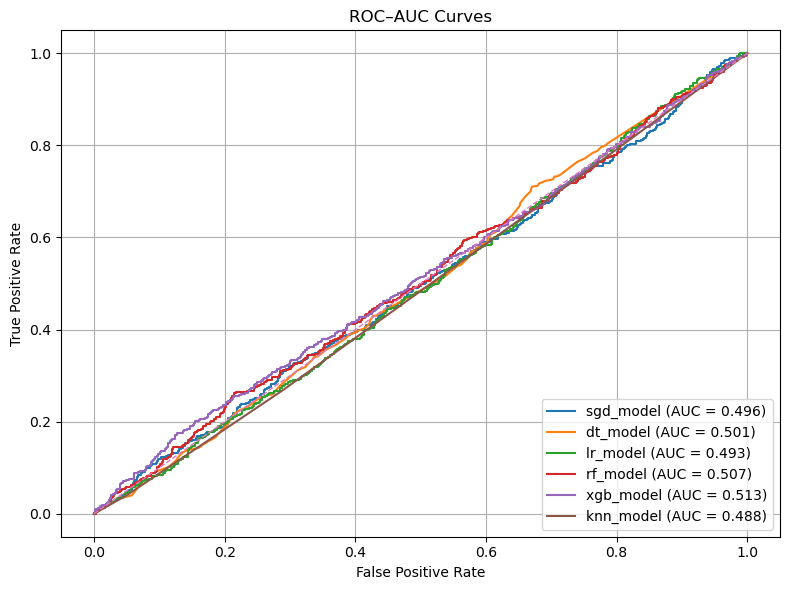

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for model_instance, model_name in Classification_Models:

    # Rebuild model
    model = model_instance.__class__(**model_instance.get_params())

    if hasattr(model, "class_weight"):
        model.set_params(class_weight="balanced")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    param_grid = param_grids.get(model_name, {})

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="recall",
        n_jobs=-1
    )

    grid.fit(xtrain, ytrain)
    best_model = grid.best_estimator_

    model_step = best_model.named_steps["model"]

    # Get probability scores
    if hasattr(model_step, "predict_proba"):
        y_scores = best_model.predict_proba(xtest)[:, 1]
    elif hasattr(model_step, "decision_function"):
        y_scores = best_model.decision_function(xtest)
    else:
        print(f"Skipping ROC for {model_name} (no probability output)")
        continue

    # ROC computation
    fpr, tpr, _ = roc_curve(ytest, y_scores)
    auc = roc_auc_score(ytest, y_scores)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

# Reference line
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
print("\n SELECTING BEST MODEL FOR SHAP \n")

best_shap_model = None
best_shap_model_name = None
best_shap_threshold = None
best_shap_score = -np.inf   

# selection metric 
SHAP_SELECTION_METRIC = "ROC-AUC"  

for result in opt_results:

    if SHAP_SELECTION_METRIC == "ROC-AUC":
        score = result['ROC-AUC']
    elif SHAP_SELECTION_METRIC == "Opt F1":
        score = result['Opt F1']
    elif SHAP_SELECTION_METRIC == "Opt Recall":
        score = result['Opt Recall']
    else:
        raise ValueError("Invalid SHAP_SELECTION_METRIC")

    if score > best_shap_score:
        best_shap_score = score
        best_shap_model_name = result['Model']
        best_shap_threshold = result['Best Threshold']

print("Best Model for SHAP:")
print(f"Model Name        : {best_shap_model_name}")
print(f"Selection Metric  : {SHAP_SELECTION_METRIC}")
print(f"Metric Value      : {best_shap_score:.4f}")
print(f"Optimal Threshold : {best_shap_threshold:.4f}")



 SELECTING BEST MODEL FOR SHAP 

Best Model for SHAP:
Model Name        : xgb_model
Selection Metric  : ROC-AUC
Metric Value      : 0.5126
Optimal Threshold : 0.0626


In [70]:
for model_instance, model_name in Classification_Models:
    if model_name == best_shap_model_name:

        model = model_instance.__class__(**model_instance.get_params())

        if hasattr(model, "class_weight"):
            model.set_params(class_weight="balanced")

        best_shap_model = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        best_shap_model.set_params(
            **{f"model__{k.split('__')[-1]}": v
               for k, v in
               next(r['Best Params'] for r in opt_results
                    if r['Model'] == model_name).items()}
        )

        best_shap_model.fit(xtrain, ytrain)
        break


#### Feature Importance

In [71]:
final_model = best_shap_model.named_steps['model']

if hasattr(final_model, "feature_importances_"):
    print("Using tree-based feature importance")
elif hasattr(final_model, "coef_"):
    print("Using linear coefficients")
else:
    print("No native feature importance — use SHAP")


Using tree-based feature importance


In [72]:
final_model.feature_importances_

array([0.03919288, 0.03748285, 0.03796043, 0.03883175, 0.0373177 ,
       0.03243893, 0.04150657, 0.03298623, 0.0305633 , 0.04148732,
       0.03583989, 0.03106855, 0.03412905, 0.03188696, 0.03953039,
       0.03974448, 0.03998872, 0.03939112, 0.03690451, 0.03536224,
       0.03641235, 0.03744026, 0.03993529, 0.03948912, 0.03981948,
       0.03853432, 0.03475529], dtype=float32)

In [73]:
xtrain.head(2)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
1034,21,1,250,78,1,0,1,0,1,2.392506,1,1,1,4,11.451720,273208,23.575795,176,2,5,109,76,94.303181,0.192143,8284,20,1
5408,41,1,172,83,1,1,1,1,0,9.494553,0,1,0,3,9.373237,103732,25.773309,251,2,8,134,106,77.319926,0.915293,14204,24,0


In [74]:
importance = final_model.feature_importances_

In [75]:
feature_names=xtrain.columns

In [76]:
feature_importance_df=pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [77]:
feature_importance_df=feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
6,Smoking,0.041507
9,Exercise Hours Per Week,0.041487
16,BMI,0.039989
22,BMI_Stress,0.039935
24,BP_Product,0.039819
15,Income,0.039744
14,Sedentary Hours Per Day,0.039530
23,Activity_Ratio,0.039489
17,Triglycerides,0.039391
0,Age,0.039193


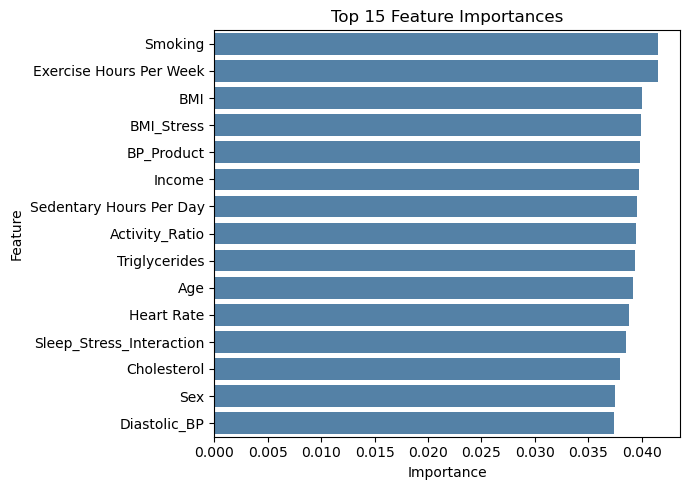

In [78]:
# Select top 15 features by importance
top15_features = (feature_importance_df.sort_values(by="Importance", ascending=False).head(15))

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=top15_features,
    x="Importance",
    y="Feature",
    color="steelblue"
)

plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### SHAP analysis

In [103]:
import shap

In [104]:
# Extract XGBoost model safely
if hasattr(final_model, "named_steps"):
    xgb_model = final_model.named_steps["model"]
else:
    xgb_model = final_model

In [106]:
X_shap = xtest.copy()   

explainer = shap.TreeExplainer(xgb_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_shap)

# Binary classification handling
if isinstance(shap_values, list):
    shap_class_values = shap_values[1]

elif shap_values.ndim == 3:
    shap_class_values = shap_values[:, :, 1]

else:
    shap_class_values = shap_values

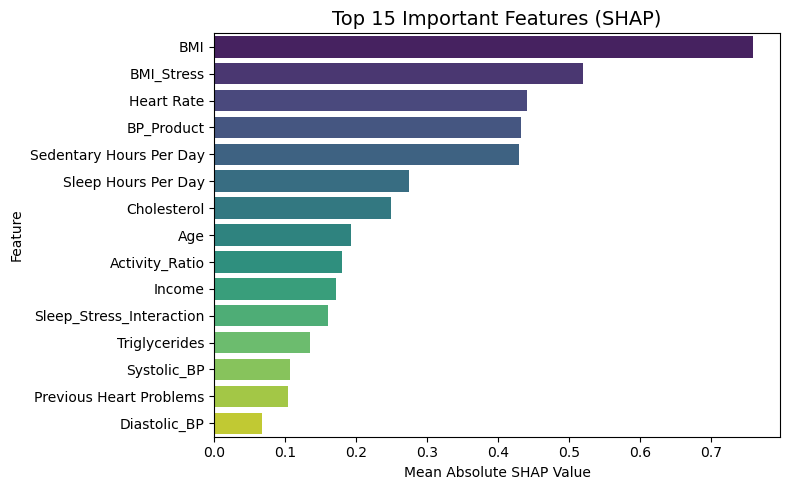

In [107]:
shap_df = pd.DataFrame(shap_class_values, columns=X_shap.columns)

mean_shap_values = (shap_df.abs().mean().sort_values(ascending=False))

feature_importance_df = pd.DataFrame({
    "Feature": mean_shap_values.index,
    "Mean |SHAP Value|": mean_shap_values.values
})


plt.figure(figsize=(8, 5))

sns.barplot(
    data=feature_importance_df.head(15),
    x="Mean |SHAP Value|",
    y="Feature",
    palette="viridis"
)

plt.title("Top 15 Important Features (SHAP)", fontsize=14)
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

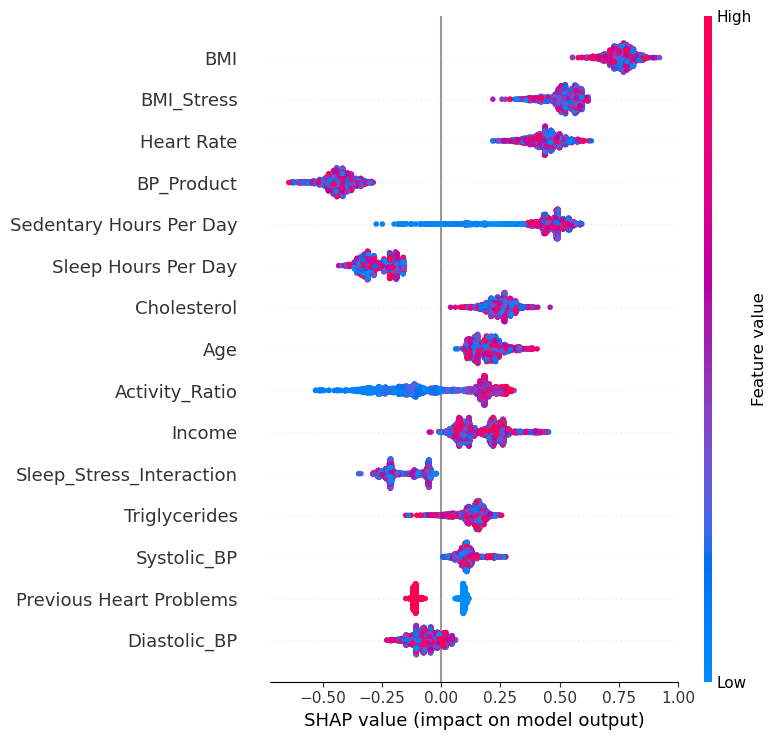

In [108]:
shap.summary_plot(shap_class_values, X_shap, feature_names=X_shap.columns, max_display=15)

#### Regression Models

In [109]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [110]:
# Initialize and train regression models

Regression_Models = [
    (LinearRegression(), 'linear_reg'),
    (Ridge(), 'ridge_reg'),
    (Lasso(), 'lasso_reg'),
    (ElasticNet(), 'elasticnet_reg'),
    (DecisionTreeRegressor(random_state=42), 'dt_reg'),
    (RandomForestRegressor(random_state=42), 'rf_reg')
]

In [111]:
Regression_Models

[(LinearRegression(), 'linear_reg'),
 (Ridge(), 'ridge_reg'),
 (Lasso(), 'lasso_reg'),
 (ElasticNet(), 'elasticnet_reg'),
 (DecisionTreeRegressor(random_state=42), 'dt_reg'),
 (RandomForestRegressor(random_state=42), 'rf_reg')]

In [112]:
# Hypertuning of Regression Models

param_grids1 = {
    'linear_reg': {},

    'ridge_reg': {
        'model__alpha': [0.01, 0.1, 1, 10, 100]
    },

    'lasso_reg': {
        'model__alpha': [0.001, 0.01, 0.1, 1]
    },

    'elasticnet_reg': {
        'model__alpha': [0.001, 0.01, 0.1, 1],
        'model__l1_ratio': [0.2, 0.5, 0.8]
    },

    'dt_reg': {
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },

    'rf_reg': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }
}

In [88]:
print("\n REGRESSION MODELS (SCALED + TUNED) \n")

reg_results1 = []
trained_for_shap1 = {}

best_model_name1 = None
best_model_for_shap1 = None
best_test_rmse = np.inf   

for model, name in Regression_Models:

    # Pipeline
    pipeline1 = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Grid Search
    grid1 = GridSearchCV(
        estimator=pipeline1,
        param_grid=param_grids1.get(name, {}),
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    grid1.fit(xtrain, ytrain)

    best_pipeline1 = grid1.best_estimator_
    best_params1 = grid1.best_params_
    best_cv_rmse = -grid1.best_score_

    #  Prediction
    y_pred = best_pipeline1.predict(xtest)

    # Metrics
    r2 = r2_score(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    rmse = np.sqrt(mse)

    # Correlations
    if np.std(y_pred) == 0 or np.std(ytest) == 0:
        pearson_r, pearson_p = np.nan, np.nan
        spearman_r, spearman_p = np.nan, np.nan
    else:
        pearson_r, pearson_p = pearsonr(ytest, y_pred)
        spearman_r, spearman_p = spearmanr(ytest, y_pred)

    # Results
    reg_results1.append({
        'Model': name,
        'Best Params': best_params1,
        'CV RMSE': best_cv_rmse,
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'Pearson r': pearson_r,
        'Pearson p': pearson_p,
        'Spearman r': spearman_r,
        'Spearman p': spearman_p
    })

    # store best model for shap 
    trained_for_shap1[name] = best_pipeline1

    # select best model for shap
    if rmse < best_test_rmse:
        best_test_rmse = rmse
        best_model_name1 = name
        best_model_for_shap1 = best_pipeline1

# Results table
reg_results1_df = pd.DataFrame(reg_results1).sort_values(by="RMSE").reset_index(drop=True)

print(f"\n Best model for SHAP (lowest RMSE): {best_model_name1}")
reg_results1_df



 Best model for SHAP (lowest RMSE): lasso_reg


,Model,Best Params,CV RMSE,R2,MAE,MSE,RMSE,Pearson r,Pearson p,Spearman r,Spearman p
0,lasso_reg,{'model__alpha': 0.1},0.479505,-7.114831e-09,0.459798,0.229905,0.479484,NaN,NaN,NaN,NaN
1,elasticnet_reg,"{'model__alpha': 0.1, 'model__l1_ratio': 0.2}",0.479505,-7.114831e-09,0.459798,0.229905,0.479484,NaN,NaN,NaN,NaN
2,linear_reg,{},0.480733,-2.824725e-03,0.459664,0.230554,0.480161,0.004986,0.834754,-0.002861,0.904714
3,ridge_reg,{'model__alpha': 100},0.480621,-3.036427e-03,0.459741,0.230603,0.480211,0.001223,0.959193,-0.007812,0.743769
4,rf_reg,"{'model__max_depth': 10, 'model__n_estimators'...",0.481290,-5.818110e-03,0.459227,0.231243,0.480877,0.008791,0.713003,0.004587,0.847814
5,dt_reg,"{'model__max_depth': 5, 'model__min_samples_sp...",0.485949,-2.024561e-02,0.459342,0.234560,0.484313,0.007403,0.756776,-0.006478,0.786378


In [89]:
# Select best model for SHAP 

# Ensure results are sorted by RMSE (lowest is best)
reg_results1_df = reg_results1_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

best_row = reg_results1_df.iloc[0]   #lowest RMSE
best_model_name_shap1 = best_row["Model"]
best_model_for_shap1 = trained_for_shap1[best_model_name_shap1]

print(f"\nBest model selected for SHAP (lowest RMSE): {best_model_name_shap1}")
print(best_row)


Best model selected for SHAP (lowest RMSE): lasso_reg
Model                      lasso_reg
Best Params    {'model__alpha': 0.1}
CV RMSE                     0.479505
R2                              -0.0
MAE                         0.459798
MSE                         0.229905
RMSE                        0.479484
Pearson r                        NaN
Pearson p                        NaN
Spearman r                       NaN
Spearman p                       NaN
Name: 0, dtype: object


In [90]:
best_model_name_shap1 = best_pipeline1.named_steps["model"]

In [91]:
best_model_name_shap1.feature_importances_

array([0.06264245, 0.00560937, 0.07235811, 0.05661365, 0.00522673,
       0.00571615, 0.00297484, 0.00570612, 0.00436813, 0.06654844,
       0.00950674, 0.00507666, 0.00585895, 0.01208375, 0.07739892,
       0.08030328, 0.08031871, 0.07655324, 0.02666954, 0.02077418,
       0.05077   , 0.04606818, 0.05829678, 0.05658682, 0.06612128,
       0.03558795, 0.00426103])

In [92]:
xtrain.head(2)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic_BP,Diastolic_BP,BMI_Stress,Activity_Ratio,BP_Product,Sleep_Stress_Interaction,Substance_Use
1034,21,1,250,78,1,0,1,0,1,2.392506,1,1,1,4,11.451720,273208,23.575795,176,2,5,109,76,94.303181,0.192143,8284,20,1
5408,41,1,172,83,1,1,1,1,0,9.494553,0,1,0,3,9.373237,103732,25.773309,251,2,8,134,106,77.319926,0.915293,14204,24,0


In [93]:
importance = best_model_name_shap1.feature_importances_

In [94]:
feature_names1=xtrain.columns

In [95]:
feature_importance1_df=pd.DataFrame({'Feature': feature_names, 'Importance': importance})

In [96]:
feature_importance1_df

,Feature,Importance
0,Age,0.062642
1,Sex,0.005609
2,Cholesterol,0.072358
3,Heart Rate,0.056614
4,Diabetes,0.005227
5,Family History,0.005716
6,Smoking,0.002975
7,Obesity,0.005706
8,Alcohol Consumption,0.004368
9,Exercise Hours Per Week,0.066548


In [97]:
feature_importance1_df=feature_importance1_df.sort_values(by="Importance", ascending=False)
feature_importance1_df

,Feature,Importance
16,BMI,0.080319
15,Income,0.080303
14,Sedentary Hours Per Day,0.077399
17,Triglycerides,0.076553
2,Cholesterol,0.072358
9,Exercise Hours Per Week,0.066548
24,BP_Product,0.066121
0,Age,0.062642
22,BMI_Stress,0.058297
3,Heart Rate,0.056614


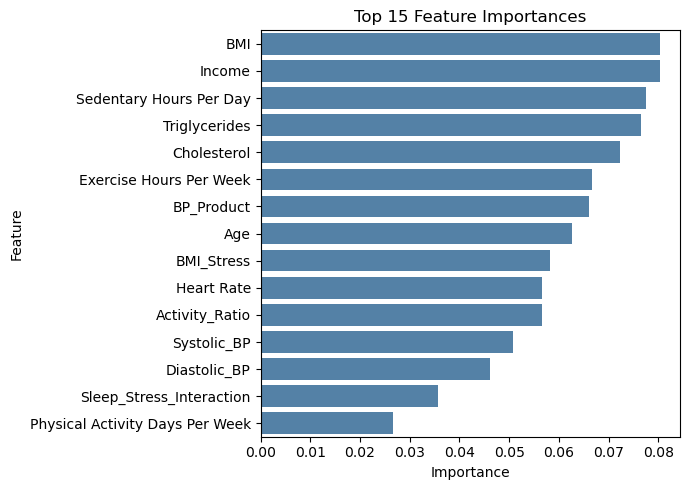

In [98]:
# Select top 15 features by importance
Top15_features = (feature_importance1_df.sort_values(by="Importance", ascending=False).head(15))

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(
    data=Top15_features,
    x="Importance",
    y="Feature",
    color="steelblue"
)

plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### SHAP Analysis

In [99]:
import shap
from sklearn.preprocessing import MinMaxScaler

In [100]:
# Extract scaler and model from pipeline
scaler = best_model_for_shap1.named_steps["scaler"]
model_step = best_model_for_shap1.named_steps["model"]

# Get feature names used during training
feature_names1 = xtest.columns  # safe because scaler keeps column order

# Create aligned scaled DataFrames
X_train_scaled_df = pd.DataFrame(
    scaler.transform(xtrain),
    columns=feature_names1
)

X_test_scaled_df = pd.DataFrame(
    scaler.transform(xtest),
    columns=feature_names1
)


In [101]:
# Create SHAP masker
masker = shap.maskers.Independent(X_train_scaled_df)

# Initialize LinearExplainer
explainer = shap.LinearExplainer(
    model_step,
    masker=masker
)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled_df)

# Sanity checks
print("SHAP shape:", shap_values.shape)
print("Mean |SHAP|:", np.mean(np.abs(shap_values)))


SHAP shape: (1753, 27)
Mean |SHAP|: 0.0


##### The Lasso model shrunk all the features coefficients to zero as it learned no linear relationship between the features